# **1. Initial Steps**

## 1.1 Importing libraries and NPRI file

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#using ExcelFile for checking the sheets in it (read_excel does not allow me to do it)
#https://stackoverflow.com/questions/26474693/excelfile-vs-read-excel-in-pandas

dataset = pd.ExcelFile('NPRI_2000-2022.xlsx')  #assigning the entire dataset to a variable

pd.set_option('display.max_columns', None)    #setting up notebook so that all columns are displayed

## 1.2 Exploring file contents

In [74]:
print(dataset.sheet_names)

['Releases 2000-2020', 'Disposals and Transfers 00-20', 'Comments']


## 1.3 Making safe copies

In [75]:
df_releases = pd.read_excel('NPRI_2000-2022.xlsx', sheet_name=0) #assigning "releases" sheet to variable
df_disposals = pd.read_excel('NPRI_2000-2022.xlsx', sheet_name=1) #assigning "disposals" sheet to variable
df_comments = pd.read_excel('NPRI_2000-2022.xlsx', sheet_name=2)  #assigning "comments" sheet to variable

In [76]:
#making a copy of each one of the tabs for safety
df1_releases = df_releases.copy()
df1_disposals = df_disposals.copy()
df1_comments = df_comments.copy()

# **2. Data Understanding**

**Business Understanding**

This dataset is information from the National Pollutant Release Inventory (NPRI).
This is Canada's public inventory of pollutant releases (to air, water, and land) and disposals/transfers for recycling from facilities across the country. It is run by Environment and Climate Change Canada (ECCC).

Its primary goal is transparency: providing Canadians with information about releases of substances of concern from industrial sources.

**Dataset Understanding**

The dataset is split into 3 related components, and understanding their difference is key:

## **2.1 Releases sheet**

### 2.1.1 Overview

**1. Releases:** This show pollutants leaving the facility's control and entering the environment (air, water, or land).  
This **the focus** of our environmental impact study.

In [77]:
#explore the dataset

#checking for the first 20 columns
df1_releases.head(20)

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_d’estimation,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7664-38-2,Phosphoric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
6,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7664-93-9,Sulphuric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
7,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7782-50-5,Chlorine,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.61,NaN,NaN,NaN
9,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 14,Zinc (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.26,NaN,NaN,NaN


### 2.1.2 Shape and information

In [78]:
#checking the shape of the releases sheet from the dataset
df1_releases.shape

(737516, 28)

In [79]:
#checking information about the releases sheet
df1_releases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

### 2.1.3 Adjusting columns names

In [80]:
#adjusting the names to make it easier no navigate through and for better visualisation
df1_releases = df1_releases.rename(columns={'Reporting_Year / Année': 'reporting_year',
                             'NPRI_ID / No_INRP': 'NPRI_ID',
                             'Number of employees': 'employees_number',
                             "Company_Name / Dénomination_sociale_de_l'entreprise":'company_name',
                             'Facility_Name / Installation': 'facility_name',
                             'NAICS / Code_SCIAN': 'NAICS_code',
                             'NAICS Title / Titre Code_SCIAN':'NAICS_title',
                             'PROVINCE': 'province',
                             'City': 'city',
                             'Latitude': 'latitude',
                             'Longitude': 'longitude',
                             'CAS_Number / No_CAS': 'CAS_number',
                             'Substance Name (English) / Nom de substance (Anglais)': 'substance_name',
                             'Units / Unités': 'units',
                             "Estimation_Method / Méthode_d’estimation": 'est_method',
                             'Release to Air - Fugitive': 'rta_fugitive',
                             'Release to Air - Other Non-Point ': 'rta_other_non_point',
                             'Release to Air - Road dust  ': 'rta_road_dust',
                             'Release to Air - Spills ': 'rta_spills',
                             'Release to Air - Stack / Point  ': 'rta_stack_point',
                             'Release to Air - Storage / Handling ': 'rta_storage_handling',
                             'Releases to Land - Leaks': 'rtl_leaks',
                             'Releases to Land - Other ': 'rtl_other',
                             'Releases to Land - Spills ': 'rtl_spills',
                             'Releases to Water Bodies - Direct Discharges ': 'rtwb_direct_discharges',
                             'Releases to Water Bodies - Leaks': 'rtwb_leaks',
                             'Releases to Water Bodies - Spills ': 'rtwb_spills',
                             'Sum of release to all media (<1tonne)': 'sum_release2all'})

In [81]:
df1_releases['units'].unique()

array(['tonnes', 'kg', 'grams', 'g TEQ'], dtype=object)

In [82]:
df1_releases['NPRI_ID'].nunique()

21868

### 2.1.4 Data types

In [83]:
#checking columns datatypes
df1_releases.dtypes

,0
reporting_year,int64
NPRI_ID,int64
employees_number,object
company_name,object
facility_name,object
NAICS_code,int64
NAICS_title,object
province,object
city,object
latitude,float64


In [84]:
#adjusting datatypes

#employees_number column had '(blank)' values, so we adjusted it to be able to do the data type change
df1_releases['employees_number'] = df1_releases['employees_number'].astype(str).str.replace('(blank)', '', regex=False)
df1_releases['employees_number'] = pd.to_numeric(df1_releases['employees_number'], errors='coerce').astype('Int64')

df1_releases[['company_name',
              'facility_name',
              'NAICS_title',
              'province',
              'city',
              'substance_name',
              'units',
              'est_method']] = df1_releases[['company_name',
                                             'facility_name',
                                             'NAICS_title',
                                             'province',
                                             'city',
                                             'substance_name',
                                             'units',
                                             'est_method']].astype('category')

df1_releases[['NAICS_code', 'CAS_number']] = df1_releases[['NAICS_code', 'CAS_number']].astype('string')

df1_releases.dtypes

,0
reporting_year,int64
NPRI_ID,int64
employees_number,Int64
company_name,category
facility_name,category
NAICS_code,string[python]
NAICS_title,category
province,category
city,category
latitude,float64


In [85]:
df1_releases.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.5 Units conversion

In [86]:
#Sort chronologically per facility substance year
df1_releases = df1_releases.sort_values(['NPRI_ID', 'substance_name', 'reporting_year']).reset_index(drop=True)

#Unit conversion and target creation (outside pipeline)
#convert units: total_release_all_kg
release_cols = [
        'rta_fugitive', 'rta_other_non_point', 'rta_road_dust', 'rta_spills',
        'rta_stack_point', 'rta_storage_handling', 'rtl_leaks', 'rtl_other',
        'rtl_spills', 'rtwb_direct_discharges', 'rtwb_leaks', 'rtwb_spills',
        ]

#calculate total releases and convert to kg
df1_releases['total_release_all'] = df1_releases[release_cols].sum(axis=1)
df1_releases['units_clean'] = df1_releases['units'].astype(str).str.strip().str.lower()
conversion_factors = {
    'grams': 0.001, 'gram': 0.001, 'g': 0.001,
    'kilograms': 1, 'kg': 1,
    'tonnes': 1000, 'tonne': 1000, 't': 1000,
    'g teq': np.nan
}
df1_releases['unit_factor'] = df1_releases['units_clean'].map(conversion_factors)
df1_releases['total_release_all_kg'] = df1_releases['total_release_all'] * df1_releases['unit_factor']
df1_releases = df1_releases.drop(columns=['units_clean','unit_factor'])

#dropping null values created from g teq from the total release all kg
df1_releases = df1_releases.dropna(subset=['total_release_all_kg'])

In [87]:
npri_id_gteq = df_releases[df_releases['Units / Unités'] == 'g TEQ']
npri_id_gteq['Substance Name (English) / Nom de substance (Anglais)'].unique()

array(['Dioxins and furans - total'], dtype=object)

### 2.1.5 Observations

**Basic Statistics**
- **Records:** 737,516 records
- **Columns:** 28 columns
- **Temporal Coverage:** 2000 to 2022
- **Focus:** Pollutant releases to the environment.

**Key Data Components**  

**Temporal and Identification Data**
- **Columns:** `Reporting_Year / Année`, `NPRI_ID / No_INRP`, `CAS_Number / No_CAS`
- **Completeness:** Fully complete (737,516 non-null entries)

**Sector and Location Data**
- **Columns:** `NAICS Title / Titre Code_SCIAN`, `PROVINCE`, `City`, `Latitude`, `Longitude`

**Pollutant and Measurement Data**
- **Columns:** `Substance Name (English) / Nom de substance (Anglais)`, `Units / Unités`

**Target Variables (Releases)**
- **Structure:** 15 columns detailing release quantities
- **Examples:** `Release to Air - Stack / Point`, `Releases to Land - Spills`

**Unit Conversion and Target Construction**

**Purpose:**
- To prepare a consistent target variable while avoiding data leakage by ensuring all unit handling occurs before splitting and merging comments.

**Workflow Overview:**

- *Sorting and Pre-Processing*

  - Before any transformation, the dataset is sorted to maintain a stable order. This ensures that when we eventually create a train-test split inside the pipeline, no look-ahead leakage occurs from unit conversions or engineered features.

- *Target Variable Construction*
  - The target is created by summing all release-related columns across each row (i.e., summing along axis 1). This produces a single unified release value that represents the total quantity emitted across all pathways.

- *Unit Standardization*
  - Because NPRI data reports releases in multiple measurement units, the next step is to normalize everything to a consistent base unit.

  - **To do this:**

    - Each unit in the dataset is mapped to a predefined unit-conversion factor.

    - These factors are applied to convert the raw summed target variable into the target unit of interest — kilograms.
    - This ensures comparability across facilities, substances, and reporting years.

 - *Cleanup of Intermediate Features*
    - After conversion, temporary helper columns (e.g., `units_clean`, `unit_factor`) are removed to keep the final dataset minimal and clean.

- *Handling Unsupported Units*
    - The unit GTEC could not be converted to kilograms using any meaningful or mathematically consistent factor.
    - Because of this, all rows where GTEC appears are assigned np.nan during the mapping step and subsequently removed from the dataset.

## **2.2 Disposals sheet**

### 2.2.1 Overview

**2. Disposals and Transfers:** This describes Pollutants sent off-site for final disposal, treatment or recycling. Not a release to the immediate environment but still represents material handling.

In [88]:
#checking for the first 20 columns
df1_disposals.head(20)

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_d’estimation,Off-site Disposal - Land Treatment,Off-site Disposal - Landfill,Off-site Disposal - Storage,Off-site Disposal - Tailings Management,Off-site Disposal - Underground Injection,Off-site Disposal - Waste Rock management,Off-site Transfers for Recycling - Energy Recovery,Off-site Transfers for Recycling - Other,Off-site Transfers for Recycling - Recovery of Acids and Bases,Off-site Transfers for Recycling - Recovery of Catalysts,Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals),Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds,Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents),Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues,Off-site Transfers for Recycling - Recovery of Solvents,Off-site Transfers for Recycling - Refining or Re-use of Used Oil,Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal,Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant,Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment,On-site Disposal - Land Treatment,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.07,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 14,Zinc (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.38,NaN,NaN,NaN,NaN
2,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,2.64,NaN,NaN,NaN
3,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 10,Mercury (and its compounds),kg,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.70,NaN,NaN,NaN
4,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 16,Ammonia (total),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN
5,2000,7,45,"BORDEN CHIMIE CANADA, INC.",BORDEN CHIMIE - LAVAL,325210,Resin and synthetic rubber manufacturing,QC,LAVAL,45.579700,-73.721700,106-89-8,Epichlorohydrin,tonnes,O - Engineering Estimates,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,7,45,"BORDEN CHIMIE CANADA, INC.",BORDEN CHIMIE - LAVAL,325210,Resin and synthetic rubber manufacturing,QC,LAVAL,45.579700,-73.721700,108-95-2,Phenol (and its salts),tonnes,O - Engineering Estimates,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,7,45,"BORDEN CHIMIE CANADA, INC.",BORDEN CHIMIE - LAVAL,325210,Resi

### 2.2.2 Shape and information

In [89]:
#checking the shape of the disposals sheet from the dataset
df1_disposals.shape

(191645, 41)

In [90]:
#checking the information of disposals
df1_disposals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191551 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191019 non-null  object 
 5   NAICS / Code_SCIAN     

### 2.2.3 Observations

**Basic Statistics**
- **Records:** 191,645 entries
- **Columns:** 41 columns
- **Memory Usage:** 59.9+ MB
- **Data Types:** 28 float64, 3 int64, 10 object

**Key Data Components**

**Core Identification Data**
- **Columns:** `Reporting_Year / Année`, `NPRI_ID / No_INRP`, `Company_Name / Dénomination_sociale_de_l'entreprise`, `Facility_Name / Installation`
- **Completeness:** High completeness (191,645 non-null for most)

**Sector and Location Data**
- **Columns:** `NAICS / Code_SCIAN`, `NAICS Title / Titre Code_SCIAN`, `PROVINCE`, `City`, `Latitude`, `Longitude`
- **Completeness:** High for NAICS and province, moderate for coordinates (190,474 non-null)

**Pollutant and Method Data**
- **Columns:** `CAS_Number / No_CAS`, `Substance Name (English) / Nom de substance (Anglais)`, `Units / Unités`, `Estimation_Method / Méthode_d'estimation`
- **Completeness:** Fully complete (191,645 non-null)

**Target Variables (Disposals and Transfers)**
- **Structure:** 26 columns detailing various disposal and transfer pathways
- **Categories:**
  - **Off-site Disposal:** Land treatment, landfill, storage, tailings management, etc.
  - **Off-site Transfers for Recycling:** Energy recovery, metal recovery, solvent recovery, etc.
  - **Off-site Transfers for Treatment:** Biological, chemical, incineration, sewage treatment
  - **On-site Disposal:** Land treatment, landfill, tailings management, etc.
- **Data Sparsity:** Most disposal/transfer columns have significant null values (ranging from 138 to 59,734 non-null values).

## **2.3 Comments sheet**

### 2.3.1 Overview

**Comments:** This is a supplementary text provided by the reporting facility, which can offer crucial context for unusual reporting values or activities.

In [91]:
#checking for the first 20 columns
df1_comments.head(20)

,Reporting_Year / Année,NPRI_ID / No_INRP,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title EN / Titre Code SCIAN EN,NAICS Title FR / Titre Code SCIAN FR,PROVINCE,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Substance Name (French) / Nom de substance (Français),Comment_Type_Name (English) Type_de_commentaire (Anglais),Comment_Type_Name (French) Type_de_commentaire (Français),Comment / Commentaires
0,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,100-42-5,Styrene,Styrène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less wood waste (hog fuel) was combust...
1,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-10-1,Methyl isobutyl ketone,Méthylisobutylcétone,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less wood waste (hog fuel) was combust...
2,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-95-2,Phenol (and its salts),Phénol (et ses sels),On-site releases comment,Commentaire sur les rejets sur le site,Reduction in (bleached pulp) production rates ...
3,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,118-74-1,Hexachlorobenzene,Hexachlorobenzène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 more natural gas was combusted in the ...
4,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,120-12-7,Anthracene,Anthracène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
5,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,120-80-9,Catechol,Catéchol,On-site releases comment,Commentaire sur les rejets sur le site,"Estimated quantity ""released to land"" is based..."
6,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,129-00-0,Pyrene,Pyrène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
7,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,206-44-0,Fluoranthene,Fluoranthène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
8,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,208-96-8,Acenaphthylene,Acénaphthylène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
9,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,218-01-9,Chrysene,Chrysène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...


### 2.3.2 Shape and information

#### 2.3.2.1 Shape

In [92]:
#checking the shape of the comments sheet from the dataset
df1_comments.shape

(363310, 14)

#### 2.3.2.2 Info

In [93]:
#checking information about the comments sheet.
df1_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363310 entries, 0 to 363309
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count   Dtype 
---  ------                                                     --------------   ----- 
 0   Reporting_Year / Année                                     363310 non-null  int64 
 1   NPRI_ID / No_INRP                                          363310 non-null  int64 
 2   Company_Name / Dénomination_sociale_de_l'entreprise        363310 non-null  object
 3   Facility_Name / Installation                               359305 non-null  object
 4   NAICS / Code_SCIAN                                         363310 non-null  int64 
 5   NAICS Title EN / Titre Code SCIAN EN                       363294 non-null  object
 6   NAICS Title FR / Titre Code SCIAN FR                       363294 non-null  object
 7   PROVINCE                                                   363310 non-null  object
 8   CAS_

#### 2.3.2.3 Adjusting names

Here we are renaming columns to consistent names that align with the releases sheet, so it makes it easier to combine this sheet with the releases one.

In [94]:
#adjusting the names to make it easier no navigate through and for better visualisation
df1_comments = df1_comments.rename(columns={'Reporting_Year / Année': 'reporting_year',
                             'NPRI_ID / No_INRP': 'NPRI_ID',
                             'Number of employees': 'employees_number',
                             "Company_Name / Dénomination_sociale_de_l'entreprise":'company_name',
                             'Facility_Name / Installation': 'facility_name',
                             'NAICS / Code_SCIAN': 'NAICS_code',
                             'NAICS Title EN / Titre Code SCIAN EN':'NAICS_title',
                             'PROVINCE': 'province',
                             'City': 'city',
                             'CAS_Number / No_CAS': 'CAS_number',
                             'Substance Name (English) / Nom de substance (Anglais)': 'substance_name',
                             "Comment_Type_Name (English) Type_de_commentaire (Anglais)": 'comment_type',
                             'Comment / Commentaires': 'comment_detail'})

df1_comments.dtypes

,0
reporting_year,int64
NPRI_ID,int64
company_name,object
facility_name,object
NAICS_code,int64
NAICS_title,object
NAICS Title FR / Titre Code SCIAN FR,object
province,object
CAS_number,object
substance_name,object


#### 2.3.2.4 Adjusting dadatypes

Here we are adjusting the datatypes to be aligned with the releases sheet, so it makes it easier to combine this sheet with the releases one.

In [95]:
#adjusting datatypes in comments sheet, so they are aligned with releases sheet (for merging)

#numeric
df1_comments['reporting_year'] = df1_comments['reporting_year'].astype('int64')
df1_comments['NPRI_ID']        = df1_comments['NPRI_ID'].astype('int64')

#string codes
df1_comments['NAICS_code'] = df1_comments['NAICS_code'].astype('string')
df1_comments['CAS_number'] = df1_comments['CAS_number'].astype('string')

#categorical text columns
cat_cols = [
    'company_name',
    'facility_name',
    'NAICS_title',
    'province',
    'substance_name',
    'comment_type'
]

for col in cat_cols:
    df1_comments[col] = df1_comments[col].astype('category')

#comments text as string (we'll clean and adjust this later)
df1_comments['comment_detail'] = df1_comments['comment_detail'].astype('string')

### 2.3.3 Comments details

#### 2.3.3.1 Unique values

In [96]:
#checking for unique values
df1_comments['comment_detail'].unique()

<StringArray>
[                                                                                                                                                                'In 2022 less wood waste (hog fuel) was combusted in the Power Boiler for energy production.',
                                                                                                                                              'Reduction in (bleached pulp) production rates & less black liquor solids were consumed by the Recovery Boiler.',
                                                                                                                                              'In 2022 more natural gas was combusted in the Recovery Boiler source & less black liquor solids were consumed.',
                                                                                                                                 'In 2022 less black liquor was put through the chemical recovery loop (in this case the S

#### 2.3.3.2 Count of rows (for NAICS 221112)

In [97]:
#checking number of rows
total_rows_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].shape[0]
total_rows_221112

13021

In [98]:
#checking number of non null comment type rows
non_null_type = df1_comments[df1_comments['NAICS_code'] == '221112']['comment_type'].notna().sum()
non_null_type

np.int64(13021)

In [99]:
#checking number of non null comment detail rows
non_null_type = df1_comments[df1_comments['NAICS_code'] == '221112']['comment_detail'].notna().sum()
non_null_type

np.int64(12818)

In [100]:
#getting all previous info ina  single cell for clarity
subset = df1_comments[df1_comments['NAICS_code'] == '221112']

summary = {
    "total_rows": subset.shape[0],
    "non_null_comment_type": subset['comment_type'].notna().sum(),
    "non_null_comment_detail": subset['comment_detail'].notna().sum()
}

summary

{'total_rows': 13021,
 'non_null_comment_type': np.int64(13021),
 'non_null_comment_detail': np.int64(12818)}

Filtering the comments only to NAICS 221112 shows a total of 13021 rows, representing all comments for the fossil fuel electricity generation sector. All rows contain comment type (13,021) and the majority also include a detailed comment (12,818). This demonstrates that comments information is well populated for our target sector and may provide additional insights into reporting behavior or estimation methods.

#### 2.3.3.3 Duplicates

##### 2.3.3.3.1 Checking for duplicates

In [101]:
df1_comments.duplicated().sum()

np.int64(0)

##### 2.3.3.3.2 Checking for same facility, year, substance dupicates

In [102]:
subset.duplicated(
    subset=['NPRI_ID', 'reporting_year', 'substance_name']
).sum()

np.int64(3417)

##### 2.3.3.3.3 Inspecting the duplicate key rows (for all comments)

In [103]:
dup_rows = subset[
    subset.duplicated(
        subset=['NPRI_ID', 'reporting_year', 'substance_name'],
        keep=False
    )
].sort_values(['NPRI_ID', 'reporting_year', 'substance_name'])

dup_rows[['NPRI_ID', 'reporting_year', 'substance_name',
          'comment_type', 'comment_detail']].head(20)

,NPRI_ID,reporting_year,substance_name,comment_type,comment_detail
354368,267,2001,Vanadium (except when in an alloy) and its com...,Disposal comment,Environment Canada National Pollutant Release ...
354369,267,2001,Vanadium (except when in an alloy) and its com...,On-site releases comment,Environment Canada National Pollutant Release ...
295188,267,2006,Mercury (and its compounds),Disposal comment,Reduction in quantity released to air coupled ...
295189,267,2006,Mercury (and its compounds),On-site releases comment,Genesee Units1-2 stack point releases to air s...
278205,267,2007,Cadmium (and its compounds),Disposal comment,Difference of more than 10% between 2006 and 2...
278206,267,2007,Cadmium (and its compounds),On-site releases comment,Stack releases different from 2006 based on ne...
248390,267,2009,Cadmium (and its compounds),Disposal comment,Increased production (more coal) as a result o...
248391,267,2009,Cadmium (and its compounds),On-site releases comment,Increased production (more coal) as a result o...
248392,267,2009,Chromium (and its compounds),Disposal comment,Increased production (more coal) as a result o...
248393,267,2009,Chromium (and its compounds),On-site releases comment,Increase in total water release in 2009 in ord...


### 2.3.4 Filtering to fossil fuel generated sectors

In [104]:
#keeping only comments for NAICS 221112
df_com_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].copy()

#checking
df_com_221112.shape

(13021, 14)

### 2.3.5 Merging rows (to be aligned with releases)

For modeling, we need at most one comment row per (NPRI_ID, reporting_year, substance_name).
Here we group by these keys and:

*   join distinct comment_type values with "; "
*   join distinct comment_detail texts with " || "

so we keep all information in just one row per key.

In [105]:
#collapsing multiple comment rows per facility–year–substance
df_comments_clean = (
    df_com_221112
    .groupby(['NPRI_ID', 'reporting_year', 'substance_name'], as_index=False, observed=True)
    .agg({
        # unique() is usually fast enough here and avoids full set/sorted
        'comment_type':   lambda x: '; '.join(x.dropna().unique()),
        'comment_detail': lambda x: ' || '.join(x.dropna().unique())
    })
)

In [106]:
#checking shape before merging
len(
    df_com_221112[['NPRI_ID','reporting_year','substance_name']]
    .drop_duplicates()
)

9604

In [107]:
#checking shape after merging
df_comments_clean.shape[0]

9604

### 2.3.6 Observations

**Basic Statistics**
- **Records:** 363,310 entries
- **Columns:** 14 columns
- **Memory Usage:** 38.8+ MB
- **Data Types:** 3 int64, 11 object

**Key Data Components**

**Core Identification Data**
- **Columns:** `Reporting_Year / Année`, `NPRI_ID / No_INRP`, `Company_Name / Dénomination_sociale_de_l'entreprise`, `Facility_Name / Installation`
- **Completeness:** High completeness for core identifiers (363,310 non-null)

**Sector Classification Data**
- **Columns:** `NAICS / Code_SCIAN`, `NAICS Title EN / Titre Code SCIAN EN`, `NAICS Title FR / Titre Code SCIAN FR`
- **Completeness:** Near-perfect for NAICS codes, very high for titles (363,294 non-null)

**Geographic Data**
- **Columns:** `PROVINCE`
- **Completeness:** Fully complete (363,310 non-null)
- **Note:** This dataset does not contain coordinate data

**Substance Information**
- **Columns:** `CAS_Number / No_CAS`, `Substance Name (English) / Nom de substance (Anglais)`, `Substance Name (French) / Nom de substance (Français)`
- **Completeness:** Fully complete for all substance identifiers

**Commentary Data**
- **Columns:** `Comment_Type_Name (English)`, `Comment_Type_Name (French)`, `Comment / Commentaires`
- **Completeness:** Fully complete for comment types, high for actual comments (358,956 non-null)
- **Note:** The comment type categorization could helps filter comments by purpose or significance

# **3. Our Goal**

## **3.1 Problem**
Our team will be working on Problem 3:  
**"Predict the releases from the fossil fuel electricity generation sector if coal power plants are entirely phased out by 2030."**

## **3.2 Our Strategy**

Considering that our objective is to predict pollutant releases from the Fossil Fuel Electricity Generation sector through 2030, specifically modeling the impact of the coal phase-out.

**1.** Isolating the 'Releases' data for this sector, so we can study the behaviour of the companies using coal against the rest of them. We are keeping the comments sheet as could have valuable information.

**2.** We need to isolate the companies from the Fossil Fuel electricity generation sector, because this is the focus of our Project.

**3.** From this subset, we need to distinguish the companies using coal (positive class) from the ones who don't use this pollutant (negative class), in order to study the behaviour of the sector with and without them.

**4.** Drop disposals sheet because is out of scope, explore comments sheet to identify any relevant information for our own understanding.

**5.** Finally, identify patterns in the fossil fuel electricity generation sector that can predict the behaviour of the industry without the positive class, by 2030.

### 3.2.1 Isolating 'Releases'

In [108]:
df1_releases.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg
0,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,107-06-2,"1,2-Dichloroethane",tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,0.00,0.00
1,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,106-99-0,"1,3-Butadiene",tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,120.00
2,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.92
3,2016,1,397,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,0.91
4,2017,1,417,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.92


### 3.2.2 Isolating Fossil Fuel electricity generation

In [109]:
#showing the record where the NAICS Title / Titre Code_SCIAN is 'Fossil-fuel electric power generation'
df1_releases[df1_releases['NAICS_title'] == 'Fossil-fuel electric power generation']

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg
10324,2001,267,117,Edmonton Power Inc.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0
10325,2002,267,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0
10326,2003,267,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0
10327,2004,267,157,CAPITAL POWER GENERATING SERVICES INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0
10328,2005,267,149,EPCOR GENERATION,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736634,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,40.2912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.2912,40291.2
736635,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,149.0212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0212,149021.2
736636,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.6389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6389,638.9
736637,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.6389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6389,638.9


**Action:** After exploring the dataset & NPRI we learn that there is a specific Code for Fossil Power Plants = 221112.  
So we create a new df with only this records to filter the instances relevant to our specific problem.

**Note:** This changes will be handled in Part 10. After cleaning is done.

### 3.2.3  Class definition Plan


**1. Positive Class**`
In order to identify the companies using coal, we explore their behaviours and learn that according to the U.S. Environmental Protection Agency and the United Nations Environment Programme, coal-fired power plants are the largest single source of mercury emissions in the United States and a principal source globally.  
sources: 1. [US EPA](https://www.epa.gov/stationary-sources-air-pollution/mercury-and-air-toxics-standards). 2. [UNEP](https://www.unep.org/resources/publication/global-mercury-assessment-2018).  

In accordance to that, the ECCC & NPRI, have stated that coal-fired power plants are a significant source of mercury emissions in Canada.
source: [CCME](https://ccme.ca/en/res/cws_mercury_epg_e.pdf).

Thus, the releases from Mercury can be used to identify the specific electricity generation companies and facilities that report releasing it into the environment. Which, in turn will identify the companies using coal for generating power.  

**2. Negative Class**
The rest of the companies belong to the negative class.

**3. Summary**
Releases Mercury = Uses coal = 1
Doesn't Release Mercury = Do NOT uses coal = 0

**Note:** All of this will be done in Part 10.

### 3.2.4 Cleaning out of scope or irrelevant information

Considering our goal, we will be keeping Releases and Comments sheet of our dataset, dropping disposal.

Further on we will select and kept only the relevant records and features towards our objective

In [110]:
#dropping disposal sheets.
df1_disposals.drop

<bound method DataFrame.drop of         Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                         2000                  1                 440   
1                         2000                  1                 440   
2                         2000                  4                 500   
3                         2000                  4                 500   
4                         2000                  4                 500   
...                        ...                ...                 ...   
191640                    2022              33844                 100   
191641                    2022              33844                 100   
191642                    2022              33867                  14   
191643                    2022              33867                  14   
191644                    2022              33869                 175   

       Company_Name / Dénomination_sociale_de_l'entreprise  \
0                  Alberta-Pacific Forest Industries Inc.    
1                  Alberta-Pacific Forest Industries Inc.    
2                                Pine Falls Paper Company    
3                                Pine Falls Paper Company    
4                                Pine Falls Paper Company    
...                                                   ...    
191640                                  Silfab Solar Inc.    
191641                                  Silfab Solar Inc.    
191642                               ChampionX Canada ULC    
191643                               ChampionX Canada ULC    
191644                          Ontario Provincial Police    

       Facility_Name / Installation  NAICS / Code_SCIAN  \
0                           (blank)              322112   
1                           (blank)              322112   
2                        Pine Falls              322122   
3                        Pine Falls              322122   
4                        Pine Falls              322122   
...                             ...                 ...   
191640            Silfab Solar Inc.              334410   
191641            Silfab Solar Inc.              334410   
191642                 Fort St John              418410   
191643                 Fort St John              418410   
191644         OPP GHQ Firing Range              912130   

                           NAICS Title / Titre Code_SCIAN PROVINCE  \
0                                     Chemical pulp mills       AB   
1                                     Chemical pulp mills       AB   
2                                         Newsprint mills       MB   
3                                         Newsprint mills       MB   
4                                         Newsprint mills       MB   
...                                                   ...      ...   
191640  Semiconductor and other electronic component m...       ON   
191641  Semiconductor and other electronic component m...       ON   
191642  Chemical (except agricultural) and allied prod...       BC   
191643  Chemical (except agricultural) and allied prod...       BC   
191644                         Provincial police services       ON   

                       City   Latitude   Longitude CAS_Number / No_CAS  \
0       County of Athabasca  54.923116 -112.861867             NA - 09   
1       County of Athabasca  54.923116 -112.861867             NA - 14   
2                PINE FALLS  50.568600  -96.226700             NA - 09   
3                PINE FALLS  50.568600  -96.226700             NA - 10   
4                PINE FALLS  50.568600  -96.226700             NA - 16   
...                     ...        ...         ...                 ...   
191640          Mississauga  43.641080  -79.688620             NA - 06   
191641          Mississauga  43.641080  -79.688620             NA - 08   
191642        Fort St. John  56.245056 -120.806564           1330-20-7   
191643        Fort St. John  56.245056 -120.806564      

## **4.1 Filtering relevant rows for our goal**

In [111]:
#before we only checked the NAICS_title correspondent to the 221112 code
#here, we will filter our data to only contain our focus

#for the releases sheet
df_rel_221112 = df1_releases[df1_releases['NAICS_code'] == '221112'].copy()

#for the comments sheet
df_com_221112 = df_comments_clean.copy()

keys = ['NPRI_ID', 'reporting_year', 'substance_name'] #assigning the keys to merge

df_com_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].copy()

#checking if we have the same numbers for both
print("Releases rows:", df_rel_221112.shape[0])
print("Comments rows:", df_com_221112.shape[0])

Releases rows: 22889
Comments rows: 13021


In [112]:
#checking what things different the same year, npri_id and substance name have.
dup_rows_rel = df_rel_221112[
    df_rel_221112.duplicated(
        subset=['NPRI_ID', 'reporting_year', 'substance_name'],
        keep=False
    )
].sort_values(['NPRI_ID', 'reporting_year', 'substance_name'])

dup_rows_rel[['NPRI_ID',
              'reporting_year',
              'substance_name',
              'employees_number',
              'company_name',
              'facility_name',
              'NAICS_code',
              'NAICS_title',
              'province',
              'city',
              'latitude',
              'longitude',
              'CAS_number',
              'units',
              'est_method',
              'total_release_all_kg']].head(20)

,NPRI_ID,reporting_year,substance_name,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,units,est_method,total_release_all_kg
10669,267,2002,PM10 - Particulate Matter <= 10 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,E - Emission Factor,2380.0
10670,267,2002,PM10 - Particulate Matter <= 10 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,O - Engineering Estimates,504830.0
10709,267,2002,PM2.5 - Particulate Matter <= 2.5 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M10,tonnes,E - Emission Factor,860.0
10710,267,2002,PM2.5 - Particulate Matter <= 2.5 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M10,tonnes,O - Engineering Estimates,252410.0
10805,267,2002,Total particulate matter,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M08,tonnes,E - Emission Factor,5880.0
10806,267,2002,Total particulate matter,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M08,tonnes,M - Monitoring or Direct Measurement,1049750.0
10573,267,2003,Manganese (and its compounds),143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - 09,tonnes,E2 - Published Emission Factors,14.0
10574,267,2003,Manganese (and its compounds),143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - 09,tonnes,M3 - Source Testing,507.0
10671,267,2003,PM10 - Particulate Matter <= 10 Micrometers,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,E2 - Published Emission Factors,2380.0
10672,267,2003,PM10 - Particulate Matter <= 10 Micrometers,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,O - Engineering Estimates,488863.0


## **4.2 Understanding the issue**

Previously, we were aggregating comments to one row per (NPRI_ID, reporting_year, substance_name).
This works if we also aggregate releases to the same grain, but in our case the releases sheet is more detailed (multiple rows per facility, year and substance).

To keep these details, we will move forward without aggregating the comments and will, instead:

- filter the original df1_comments to NAICS 221112.
- keep the relevant columns (NPRI_ID, reporting_year, substance_name, CAS_number, comment_type, comment_detail).
- merge this directly into the detailed releases dataframe (df_rel_221112) using the common keys.

This way:

- each original release row is preserved;
- if there is a matching comment, it is attached to that row;
- if there are no comments, the release row stays in the dataset with NaN for comment columns.

Originally, we were aggregating comments to *one* row per  
`(NPRI_ID, reporting_year, substance_name)`.

But this only works if the **releases** sheet is aggregated to the same level.  
However, in the fossil data the releases sheet is **much more detailed**:

- multiple CAS numbers per substance  
- multiple release rows per (facility, year, substance)  
- different estimation methods, units, and measurements for the same substance-year  

Because of this, aggregating comments caused problems:

- losing important row-level detail from the releases table  
- aggregation created only one comment row per key, but the releases had many rows  
- merging aggregated comments with detailed releases created mismatches and validation errors  
- many comment rows simply did not match the detailed releases keys

To fix this, we kept the detailed releases structure intact and instead:

1. **Filter the original comments to NAICS 221112**  
   (the same subset used for releases)
2. **Keep only the columns needed to merge**  
   (`NPRI_ID`, `reporting_year`, `substance_name`, `CAS_number`, `comment_type`, `comment_detail`)
3. **Merge the comments directly onto the detailed releases dataframe**  
   using the same detailed key:
   ```
   ['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']
   ```
4. **Accept a many-to-many merge**  
   because both releases and comments can have multiple rows per key.

So, this way:

- every original release row is preserved  
- every matching comment is attached to the exact release row it refers to  
- if there are multiple comments for the same key, we keep them all  
- if a release row has no matching comment, we still keep the row (comment fields = NaN)  
- no information about releases is lost  
- no aggregation is forced on the comments  


## **4.3 Merging the sheets**

### **4.3.1 Adjusting comments table**

Here, we prepare the comments table before merging.

**What is being done:**
- Filter comments to NAICS 221112  
- Select only columns relevant to the merge  
- Inspect the shape

**Why:**
- The comments sheet contains additional fields (`facility_name`, `company_name`, etc.) that also exist in releases.
- Keeping those would create `_x` / `_y` duplicates after merging.
- Releases is the "source of truth" for contextual facility information.
- For comments, the only new information we need is **type** and **detail**.

In [113]:
#reassigning df_com_221112 to the df1_comments before aggregating rows
df_com_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].copy()

#keeping only columns to merge from comments sheet
comment_cols_to_keep = [
    'NPRI_ID',
    'reporting_year',
    'substance_name',
    'CAS_number',
    'comment_type',
    'comment_detail'
]

df_com_221112 = df_com_221112[comment_cols_to_keep]

#checking info on the table
df_com_221112.head()

,NPRI_ID,reporting_year,substance_name,CAS_number,comment_type,comment_detail
206,267,2022,n-Hexane,110-54-3,On-site releases comment,Air emissions increased due to an increase in ...
207,267,2022,n-Hexane,110-54-3,Reason why substance was added to the report,n-Hexane emissions were greater than 10 times ...
208,267,2022,Nitrogen oxides (expressed as nitrogen dioxide),11104-93-1,On-site releases comment,Air emissions increased due to an increase in ...
209,267,2022,Hexachlorobenzene,118-74-1,On-site releases comment,Air emissions increased due to an increase in ...
210,267,2022,Carbon monoxide,630-08-0,On-site releases comment,Air emissions increased due to an increase in ...


In [114]:
#checking shape
df_com_221112.shape

(13021, 6)

In [115]:
df_com_221112.columns

Index(['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number',
       'comment_type', 'comment_detail'],
      dtype='object')

In [116]:
#collapsing multiple comment rows per facility–year–substance
df_comments_clean = (
    df_com_221112
    .groupby(['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number'], as_index=False, observed=True)
    .agg({
        # unique() is usually fast enough here and avoids full set/sorted
        'comment_type':   lambda x: '; '.join(x.dropna().unique()),
        'comment_detail': lambda x: ' || '.join(x.dropna().unique())
    })
)

In [117]:
#defining the key columns used to link releases and comments
merge_keys = ['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']

**The first merge attempt was creating new rows.**

When we first merged `df_rel_221112` (releases) with `df_com_221112` (comments), both tables had multiple rows per key (`NPRI_ID`, `reporting_year`, `substance_name`, `CAS_number`).

In this situation, a merge on these keys creates a Cartesian product per key:
for example, 2 release rows x 3 comment rows = 6 merged rows.

Then, the merged dataframe `df1` had **more rows (26,028)** than the
original releases dataframe (**22,889**).

To avoid artificially creating extra records, we:

1. **Aggregated comments** to one row per key, concatenating all comment types
   and details into a single text field.
2. Performed a **many-to-one left merge** from releases to aggregated comments.

This keeps **every original release row** and **attaches comments without
increasing the number of rows** in the dataset.

### **4.3.2 Aligning releases and comments keys**

Before merging, we verify that both tables use the same key:

In [118]:
merge_keys = ['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']

In [119]:
#releases filtered to NAICS 221112
df_rel_221112 = df1_releases[df1_releases['NAICS_code'] == '221112'].copy()

#checking if there are multiple release rows per key
df_rel_221112.duplicated(merge_keys).sum()

np.int64(1688)

- Releases *do* have many duplicated keys because many CAS rows, methods, or fields in the same substance-year.

### **4.3.3 Merging releases and comments**

We merge the detailed releases with the raw comments using a **many-to-many** validation, because

- A single facility, year, substance, CAS can have multiple comment rows (several issues raised for the same record)
- The releases sheet often has many rows per key (multiple estimation methods or pathways)

In [120]:
#merging aggregated comments back into the releases table without creating new rows
df1 = df_rel_221112.merge(
    df_comments_clean,
    on=merge_keys,
    how='left',
    validate='many_to_one'  # enforcing that comments are unique per key
)

#verifying that the number of rows is staying the same as in df_rel_221112
df_rel_221112.shape[0], df1.shape[0]

(22889, 22889)

In [121]:
df1['comment_type'].unique()

array(['On-site releases comment', nan,
       'Disposal comment; On-site releases comment', 'Disposal comment',
       'Reason why substance was added to the report ',
       'On-site releases comment; Substance criteria comment',
       'On-site releases comment; Reason why substance was added to the report ',
       'Disposal comment; On-site releases comment; Recycling comment',
       'Substance criteria comment',
       'On-site releases comment; Recycling comment',
       'Reason why substance was removed from the report',
       'Disposal comment; Recycling comment', 'Recycling comment',
       'Disposal comment; On-site releases comment; Recycling comment; Substance criteria comment',
       'Disposal comment; Recycling comment; Substance criteria comment',
       'Disposal comment; On-site releases comment; Reason why substance was added to the report ',
       'Disposal comment; On-site releases comment; Substance criteria comment',
       'On-site releases comment; Disposal

In [122]:
df1['comment_type']

,comment_type
0,On-site releases comment
1,NaN
2,NaN
3,NaN
4,NaN
...,...
22884,On-site releases comment
22885,On-site releases comment
22886,On-site releases comment
22887,On-site releases comment


In [123]:
df1['comment_detail'].notna().sum(), df1['comment_type'].notna().sum()

(np.int64(9498), np.int64(9498))

In [124]:
df1.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg,comment_type,comment_detail
0,2001,267,117,Edmonton Power Inc.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,On-site releases comment,Reporting of aluminum 'triggering' on 'otherwi...
1,2002,267,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>
2,2003,267,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>
3,2004,267,157,CAPITAL POWER GENERATING SERVICES INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>
4,2005,267,149,EPCOR GENERATION,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>


### **4.3.4 Understanding missing comments**

 checking how many comment rows actually match a release key:

In [125]:
check_rows = df_comments_clean.merge(
    df_rel_221112[merge_keys].drop_duplicates(),
    on=merge_keys,
    how='left',
    indicator=True
)

check_rows['_merge'].value_counts()

,count
_merge,
both,8508
left_only,1096
right_only,0


- **8508 comment rows match at least one release row**  
  These comments appear correctly in the merged dataset.

- **1096 comment rows do *not* have a matching key**  
  These belong to keys that do not exist in the fossil releases sheet after NAICS filtering.

- **0 right-only** means every release key exists in comments or at least does not create unmatched right keys.


In [126]:
df_rel_221112.shape[0], df1.shape[0]

(22889, 22889)

### **4.3.5 Checking keys**

We validated our keys by checking 3 key against a 4 key overlap.

In [127]:
keys_3 = ['NPRI_ID', 'reporting_year', 'substance_name']

comments_keys4 = df_com_221112[['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']].drop_duplicates()
releases_keys4 = df_rel_221112[['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']].drop_duplicates()

comments_keys3 = df_com_221112[keys_3].drop_duplicates()
releases_keys3 = df_rel_221112[keys_3].drop_duplicates()

common4 = comments_keys4.merge(releases_keys4, how='inner')
common3 = comments_keys3.merge(releases_keys3, how='inner')

len(common4), len(common3)

(8508, 8508)

With that, we conclude that removing CAS does **not** create any additional matches.

So the unmatched comments are truly out-of-scope for fossil 221112 releases and here are some hypothesis:

- They could belong to other NAICS codes  
- They could refer to substances/cas/year combinations not reported by fossil facilities  
- They could be comments on transfers or off-site activities not in `df1_releases`  
- They may be filtered out earlier due to gTEQ or unit conversion issues

And this confirms that our merge logic is correct.


### **4.3.6 Merge Strategy**

We refined our merge strategy to ensure that comments are added correctly to the releases dataset **without altering, aggregating, or duplicating release rows**. Below is a summary of the logic:

**1. We preserve the releases dataset at full granularity**

Each row in the releases table represents a specific measurement record (unique estimation method, pathway, or reporting detail).  
We do **not** aggregate, collapse, or modify these rows.

**2. We collapse the comments table so that each key combination appears only once.**
After filtering to NAICS 221112, we aggregate comments by:

- `NPRI_ID`
- `reporting_year`
- `substance_name`
- `CAS_number`

This ensures **one unique comment record per facility,year,substance**, enabling a strict `many_to_one` merge.

**3. We merge comments into releases using a validated `many_to_one` join.**
This prevents accidental many-to-many expansions and guarantees:
- Many releases rows: one comment row  
- No creation of new release rows  
- No unexpected duplication  

The merge preserves the exact row count of the releases dataset.

**4. We accept that some comments do not join.**
Unmatched comment rows are genuinely **out of scope** for fossil NAICS 221112. They probably correspond to:
- Rows filtered earlier during unit conversion or gTEQ logic
- Other NAICS codes  
- Substances not reported by fossil facilities  
- Different CAS/year combinations  
- Transfers or off-site activities  

We validated that **removing CAS does not increase the number of matches**, confirming that CAS mismatches are *not* the cause of missing joins.

**5. Final merged dataset characteristics**
After merging:

- **22889 release rows** remain intact  
- **around 9500 comment_type values** matched  
- **around 9500 comment_detail values** matched  

This gives us a **clean, reliable dataset** that:

- Preserves full measurement detail  
- Attaches comments only where keys match exactly  
- Ensures referential integrity for downstream feature engineering and modeling

In [128]:
comments_keys  = df_com_221112[merge_keys].drop_duplicates()
releases_keys  = df_rel_221112[merge_keys].drop_duplicates()

len(comments_keys), len(releases_keys)

(9604, 21201)

In [129]:
common_keys = comments_keys.merge(releases_keys, on=merge_keys, how='inner')
len(common_keys)

8508

In [130]:
keys_only_in_comments = comments_keys.merge(
    releases_keys,
    on=merge_keys,
    how='left',
    indicator=True
)

keys_only_in_comments = keys_only_in_comments[keys_only_in_comments['_merge'] == 'left_only']
keys_only_in_comments.shape

(1096, 5)

In [131]:
keys_only_in_releases = releases_keys.merge(
    comments_keys,
    on=merge_keys,
    how='left',
    indicator=True
)

keys_only_in_releases = keys_only_in_releases[keys_only_in_releases['_merge'] == 'left_only']
keys_only_in_releases.shape

(12693, 5)

Before deciding how to encode `comment_type` and `comment_detail` for modeling, we first explore their structure, frequency, and variability.  
This helps define which method is appropriate (simple encoding vs clustering vs embeddings)

### **5.1 Checking comment coverage**

Understanding what proportion of release rows carry comment information

In [132]:
df1['has_comment'] = df1['comment_detail'].notna().astype(int)

df1['has_comment'].value_counts(normalize=True)

,proportion
has_comment,
0,0.585041
1,0.414959


47.7% of rows have comments

This is almost half the dataset, and that means that comments are not rare and that they should be used as features.

What we will do:
- Create has_comment as a binary predictor
- Keep comment-type and textual meaning as additional predictors

## **5.2 Exploring comment_type**

Here, we will try to understand if there are only a few common types, ifsome types extremely rare and if they correlate with emissions increases/decreases

If types are stable and interpretable, they can be **one-hot encoded** directly.

In [133]:
df1['comment_type'].value_counts().head(20)

,count
comment_type,
On-site releases comment,5718
Substance criteria comment,812
Disposal comment; On-site releases comment; Recycling comment,743
Disposal comment; On-site releases comment,580
Recycling comment,433
Disposal comment; Recycling comment,306
On-site releases comment; Substance criteria comment,246
On-site releases comment; Recycling comment,237
Disposal comment,181


Four categories dominate almost all comment_type values.

These 4 could be one-hot encoded, but **they do not really add value to our goal, and they are directly linked to our comment_detail.**

We will most probably drop this feature.


## **5.3 Exploring patterns in comment_detail**

Here, we will investigate how often the same comment appears

### **5.3.1 Checking comments details**

From previous exploration, we know that many comments have % or > or <, and these are symbols that are important for interpretation. So we will adjust the text, but not removing all symbols

In [134]:
#creating cleaned version of the comment text preserving <, >, %, and decimal points
df1['comment_detail_clean'] = (
    #converting all characters to lowercase to standardize the text
    df1['comment_detail']
    .str.lower()
    #replacing any character that is not a letter, digit, space, <, >, %, or . with a space
    .str.replace(r'[^a-z0-9<>\.%\s]', ' ', regex=True)
    #collapsing multiple spaces into a single space to normalize spacing
    .str.replace(r'\s+', ' ', regex=True)
    #stripping leading and trailing spaces to tidy up the final string
    .str.strip()
)

#checking the most frequent cleaned comments to inspect that symbols are being preserved correctly
df1['comment_detail_clean'].value_counts().head(20)

,count
comment_detail_clean,
le facteur d mission est calcul avec le pm calculator partir du facteur d mission des particules totales de l ap 42 de l us epa.,529
le facteur d mission provient de l ap 42 de l us epa.,349
site has multiple generating units of various capacities. generating unit operating requirements vary depending on load requirements.,264
site has multiple diesel generating units of various capacities and emission rates. generating unit operating requirements vary depending on load requirements.,130
used large stationary diesel engine excel calculator,110
updated data >historical values have been updated to reflect changes in calculation methodology and or updated operational data used to determine the emissions from a facility.,110
,107
not applicable,103
normal site variability,97


### **5.3.2 Detecting language of comment details**

From the investigation before, we noticed that the `comment_detail` field has both English and French text, and since our goal is to extract semantic meaning and group comments into interpretable clusters, we first need to identify which rows are French.

We will use a lightweight language detection model to classify each comment.

In [135]:
#installing the language detection library to identify english and french comments
!pip install langdetect

#refrnce: https://pypi.org/project/langdetect/
#importing the detect function and factory settings (for reproducible language detection)
from langdetect import detect, DetectorFactory

#setting a seed to ensure the language detection results are staying consistent across runs
DetectorFactory.seed = 0  # reproducible

#function to detect the language of a given text
def detect_lang(text):
  try:
    return detect(text) #trying to detect the language and returning its language code (e.g., 'en', 'fr')
  except:
    return "unknown"  # returning "unknown" if detection is failing (for empty or problematic text)

#applying the language detection function to each cleaned comment and creating a new column storing the detected language
df1['comment_lang'] = df1['comment_detail_clean'].apply(detect_lang)

#counting how many comments are being identified as each language
df1['comment_lang'].value_counts()

,count
comment_lang,
unknown,13500
en,6981
fr,2004
it,265
ro,41
da,38
vi,22
tl,17
sl,5


In [136]:
# grouping all non french detections as english like
df1['lang_group'] = df1['comment_lang'].apply(
    lambda x: 'fr' if x == 'fr' else 'en_like'
)

df1['lang_group'].value_counts()

,count
lang_group,
en_like,20885
fr,2004


### **5.3.3 Translating french comments into english**


To make sure all comments are available in a consistent language for us to analyse later, we translate the French comments into English using a pre-trained Helsinki-NLP translation model.

Instead of translating each row individually (which is slow and repetitive), we use the following optimized workflow:

- **Translate only the rows detected as French**, existing English comments are not touched
- **Extract and get unique French comments**, so same comment is translated only once.
- **Run translation in batches**, to spped up processing and using GPU acceleration when available.
- **Map the translated text back to the original rows**, this way we preserve the full dataset structure.

We this, we can get consistent comment language, faster translation time, no duplicated work, and a foundation for NLP tasks (clustering, topic modeling, or feature engineering).

**We are still experimenting with the translation, therefore, the following code was set to be a markdown for further exploration**

``` python
!pip install transformers sentencepiece

import torch
import pandas as pd
from transformers import pipeline

#choosing device: GPU if available, otherwise CPU
device = 0 if torch.cuda.is_available() else -1

#creating translation pipeline (FR to EN)
translator = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-fr-en",
    device=device
)

#masking only rows that are French and have a non-null comment
mask_fr = (
    (df1['comment_lang'] == 'fr') &
    (df1['comment_detail_clean'].notna())
)

#getting only French comments we need to translate
french_series = df1.loc[mask_fr, 'comment_detail_clean']

#get unique texts so we translate each unique comment only once
unique_texts = french_series.unique().tolist()

print(f"Number of French rows: {french_series.shape[0]}")
print(f"Unique French comments to translate: {len(unique_texts)}")

#translate in batches
batch_size = 64   # you can try 32 if memory is tight
translations = {}

for i in range(0, len(unique_texts), batch_size):
    batch = unique_texts[i:i + batch_size]
    outputs = translator(batch, batch_size=batch_size)
    for src, out in zip(batch, outputs):
        translations[src] = out['translation_text']

#starting with the original (english stays unchanged)
df1['comment_detail_en'] = df1['comment_detail_clean']

#mapping back translations only on French rows
df1.loc[mask_fr, 'comment_detail_en'] = french_series.map(translations) ```

In [137]:
df1['comment_detail_clean'].value_counts().head(20)

,count
comment_detail_clean,
le facteur d mission est calcul avec le pm calculator partir du facteur d mission des particules totales de l ap 42 de l us epa.,529
le facteur d mission provient de l ap 42 de l us epa.,349
site has multiple generating units of various capacities. generating unit operating requirements vary depending on load requirements.,264
site has multiple diesel generating units of various capacities and emission rates. generating unit operating requirements vary depending on load requirements.,130
used large stationary diesel engine excel calculator,110
updated data >historical values have been updated to reflect changes in calculation methodology and or updated operational data used to determine the emissions from a facility.,110
,107
not applicable,103
normal site variability,97


### **5.3.4 Creating semantic clusters from translated comments**

We want to explore more, and will use sentence embeddings to convert each text comment into a numerical vector, then we will cluster these vectors using HDBSCAN to discover recurring comment themes

**This is not done in this notebookm at the moment, but we will continue exploring.**

## **5.4 Vectorizing comment_detail (TF-IDF)**

If comments show repetitive wording, we will experiment with vectorization as it helps group them semantically

# **6. Sorting data and feature engineer**

## **6.1 Sorting data**

In [138]:
# npri_preprocessor.py
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# we sorted values chronologically previously
# we managed to merge our releases and comments sheet


## **6.2 Feature Engineering**

### 6.2.1 Predicition features

In [139]:

#Time-series feature engineering (create lags/rolling/etc.) — use your code
target_col = 'total_release_all_kg'

#Lags
for lag in [1,2,3]:
    df1[f'release_lag_{lag}yr'] = df1.groupby(['NPRI_ID','substance_name'])[target_col].shift(lag)

#Rolling windows
for w in [3,5]:
    grp = df1.groupby(['NPRI_ID','substance_name'])[target_col]
    df1[f'rolling_mean_{w}yr'] = grp.transform(lambda x: x.rolling(window=w, min_periods=1).mean())
    df1[f'rolling_std_{w}yr']  = grp.transform(lambda x: x.rolling(window=w, min_periods=2).std())
    df1[f'rolling_max_{w}yr']  = grp.transform(lambda x: x.rolling(window=w, min_periods=1).max())

#YoY, momentum, cumulative, binary decline, policy features...
df1['yoy_change'] = df1.groupby(['NPRI_ID','substance_name'])[target_col].diff(1)
df1['yoy_pct_change'] = df1.groupby(['NPRI_ID','substance_name'])[target_col].pct_change(1).replace([np.inf,-np.inf],np.nan)
df1['momentum'] = df1.groupby(['NPRI_ID','substance_name'])['yoy_change'].diff(1)
df1['cumulative_release'] = df1.groupby(['NPRI_ID','substance_name'])[target_col].cumsum()
df1['is_declining'] = (df1['yoy_change'] < 0).astype(int)
# policy features...
df1['years_since_2000'] = df1['reporting_year'] - 2000
df1['post_2015'] = (df1['reporting_year'] >= 2015).astype(int)
df1['post_2018'] = (df1['reporting_year'] >= 2018).astype(int)
# is_coal flag
df1["is_using_coal"] = (df1["substance_name"].str.lower().str.contains('mercury')) & (df1["total_release_all_kg"] >= 5)

### 6.2.2 Feature for Post-Phase-Out Emissions (The $40\%$ Uplift)

The primary goal of the project is to forecast the total emissions from the fossil fuel sector after the scheduled coal phase-out.

### Scenario Assumption: What Replaces Coal?

Our goal is to estimate **total sector releases in a “no‑coal” scenario**. When coal is phased out, its generation is typically replaced by a **mix of fossil (mainly gas)** and **low/non‑emitting sources** (hydro, nuclear, wind, solar, imports), not by a single technology.

Official/authoritative sources support this qualitative picture:

- **Canada Energy Regulator (CER)** notes that coal-fired electricity in Canada is “rapidly being replaced by low/non‑emitting energy sources,” alongside natural gas:  
  https://www.cer-rec.gc.ca/en/data-analysis/energy-markets/market-snapshots/2024/market-snapshot-canadian-coal-fired-electricity-generation-rapidly-being-replaced-low-non-emitting-energy-sources.html
- **CER generation-by-fuel data** and **ECCC’s National Inventory Report** show coal declining while natural gas and non‑emitting generation increase over time:  
  https://www.canada.ca/en/environment-climate-change/services/climate-change/greenhouse-gas-emissions/inventory.html

These sources **do not** provide a single exact percentage (e.g., “X% coal → gas”), but they support a **plausible range** where roughly one‑third to one‑half of lost coal output is taken over by gas, with the rest from non‑emitting sources and imports.

In this work, we therefore adopt a **stylized scenario**:

- **40%** of phased‑out coal generation is replaced by **fossil generation** (gas/oil),
- **60%** is replaced by **low/non‑emitting sources and imports**.

Because our dataset contains **emissions only (no MWh)**, we interpret this at the **emissions level**:

- Let $E_{\text{coal}}$ be current releases from coal‑like facilities,
- We assume 40% of $E_{\text{coal}}$ is replaced by emissions from fossil generation (modelled from non‑coal facilities), and 60% is replaced by low/non‑emitting sources with **negligible additional emissions**.

Thus, our **no‑coal sector total** is:


$$ E_{\text{sector, no-coal}} \approx E_{\text{non-coal, obs}} + \hat{E}_{\text{coal} \rightarrow \text{fossil}} $$

where $\hat{E}_{\text{coal} \rightarrow \text{fossil}}$ is modelled under the 40% fossil replacement assumption. This 40/60 split is explicitly treated as a **scenario assumption**, not an observed constant.

Our model must account for the $\mathbf{40\%}$ replacement scenario, where a portion of the capacity from phased-out coal plants is replaced by new natural gas and oil facilities.  

Since we lack generation data (MWh), we cannot calculate a standard emission factor ($\text{kg}/\text{MWh}$). Instead, we use the Average Emission Per Employee (AEPE) as a proxy for facility size and operational efficiency.  
This method achieves the following logic:

1.  Calculate the low-emission rate (AEPE) using historical Gas/Oil data.

2.  Estimate the size of the converting Coal capacity (40% of their total employees).
3.  Calculate the new, lower emissions by applying the low AEPE rate to the converting size.
4.  The result, Replacement_Release_kg, is the emissions uplift we must add to our baseline Gas/Oil forecast.

#### 6.2.2.1 Data Preparation for AEPE Calculation

We first ensure the employee column, our proxy for facility size, is clean and complete.

In [140]:
# Define column names based on your existing setup
TARGET_COL = 'total_release_all_kg'
CLASS_COL = 'is_using_coal'
EMPLOYEE_COL = 'employees_number'
GROUPING_COLS = ['reporting_year', 'substance_name']
CONVERSION_FACTOR = 0.40

# 1. Data Preparation: Clean Employee Data
# Find the median of the existing non-null employee numbers.
employee_median = df1[EMPLOYEE_COL].median()

# Fill the few missing values with the median. This ensures the subsequent sum()
# operations do not result in NaN for the total employee count.
df1[EMPLOYEE_COL] = df1[EMPLOYEE_COL].fillna(employee_median)

#### 6.2.2.2 Calculate the Average Emission Per Employee (AEPE) Factor  

This is the conversion rate—the low-emission factor we apply to the converted coal size. It is calculated only from the historical data of the Negative Class (Gas/Oil facilities).$$\text{AEPE}_{i, t} = \frac{\sum \text{Releases}_{\text{Gas/Oil}} \text{ in Year } t}{\sum \text{Employees}_{\text{Gas/Oil}} \text{ in Year } t}$$

In [141]:
# 1. Filter for the Negative Class (Gas/Oil facilities: is_using_coal == False)
df_negative = df1[df1[CLASS_COL] == False].copy()

# 2. Aggregate Total Releases and Total Employees for the Negative Class by year and pollutant
df_aepe_calc = df_negative.groupby(GROUPING_COLS).agg(
    Total_Release_Negative=(TARGET_COL, 'sum'),
    Total_Employees_Negative=(EMPLOYEE_COL, 'sum')
).reset_index()

# 3. Calculate the AEPE factor (kg released per employee for the low-emitting class)
# We add a tiny epsilon (1e-6) to the denominator to prevent any division-by-zero errors.
df_aepe_calc['AEPE'] = df_aepe_calc['Total_Release_Negative'] / (df_aepe_calc['Total_Employees_Negative'] + 1e-6)

# 4. Merge the AEPE factor back to the main DataFrame (df1) using Year and Pollutant
df1 = pd.merge(
    df1,
    df_aepe_calc[GROUPING_COLS + ['AEPE']],
    on=GROUPING_COLS,
    how='left'
)

#### 6.2.2.3 Calculate the Final Replacement Releases

We estimate the size of the converting capacity by taking $40\%$ of the historical Coal employee count, and then multiply this size by the low-emission $\text{AEPE}_{\text{Gas/Oil}}$ factor.  

$$\text{Replacement\Release}_{\mathbf{kg}} = \text{AEPE}_{\text{Gas/Oil}} \times (0.40 \times \sum \text{Employees}_{\text{Coal}})$$

In [142]:
# 1. Aggregate Total Employees for the Positive Class (Coal facilities: is_using_coal == True)
df_positive = df1[df1[CLASS_COL] == True].copy()

df_employee_calc = df_positive.groupby(GROUPING_COLS).agg(
    Total_Employees_Positive=(EMPLOYEE_COL, 'sum')
).reset_index()

# 2. Merge Positive Class employee totals back into the main DataFrame (df1)
df1 = pd.merge(
    df1,
    df_employee_calc,
    on=GROUPING_COLS,
    how='left'
)

# 3. Calculate the employee count of the converting cohort
# Assuming 40% of the overall historical Coal capacity (by employee count) is converted.
df1['Total_Employees_Positive'] = df1['Total_Employees_Positive'].fillna(0)
df1['Employees_Converted'] = CONVERSION_FACTOR * df1['Total_Employees_Positive']

# 4. Calculate the final new releases (Emissions Uplift)
# This new value replaces the original, high-emission Coal releases in our final forecast.
df1['Replacement_Release_kg'] = df1['AEPE'] * df1['Employees_Converted']

# 5. Clean up helper columns used for intermediate calculation
# These columns are not needed for the ML model itself and are dropped to prevent leakage.
df1.drop(columns=[
    'Total_Employees_Positive',
    'Employees_Converted',
    'AEPE'
], inplace=True)
print("Feature 'Replacement_Release_kg' successfully created.")

Feature 'Replacement_Release_kg' successfully created.


 **Final Model Usage Strategy**

The created feature, Replacement_Release_kg, is crucial for the final prediction, as it substitutes the high-emission coal releases with the modeled low-emission gas releases.  

1.    Model Training: The time-series model should be trained only on the historical data of the Negative Class ($\mathbf{is\_using\_coal} = \mathbf{False}$).  
2.    Final Prediction: The total predicted release for the target year (e.g., 2030) is the sum of:

*   Baseline Forecast ($\mathbf{R}^{\text{Baseline}}$): The model's prediction for the existing Gas/Oil facilities.
*   Replacement Uplift ($\mathbf{R}^{\text{Uplift}}$): The sum of the Replacement_Release_kg column, which is the estimated new emission from the $40\%$ converted capacity.  

$$\text{Total Predicted Release}_{2030} = \text{R}^{\text{Baseline}}_{2030} + \text{R}^{\text{Uplift}}_{2030}$$

## 6.3 Splitting data and dropping unnecesary cols

Next, we are performing the following steps:

- Splits the data **by year** into training (≤2018) and testing (>2018).
- Separates **features (X)** and **target (y = total_release_all_kg)**.
- Keeps **only non‑coal facilities in the test set** (`is_using_coal == 0`) to evaluate a no‑coal scenario.
- Drops `is_using_coal` (so the model can’t use it as a feature) and removes any stray `comment_` column from X.

In [143]:

#Now split chronologically into train/test
cutoff = 2018
train_df = df1[df1['reporting_year'] <= cutoff].copy()
test_df  = df1[df1['reporting_year'] > cutoff].copy()

#Separate X and y (target already created)
target = 'total_release_all_kg'
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test  = test_df.drop(columns=[target])
y_test  = test_df[target]

#Filter out coal from testing ONLY
X_test_without_coal = X_test[X_test["is_using_coal"] == 0]
y_test_without_coal = y_test.loc[X_test_without_coal.index]

#Drop IsCoal before pipeline
X_train = X_train.drop(columns=["is_using_coal"])
X_test_without_coal = X_test_without_coal.drop(columns=["is_using_coal"])

# Defensively drop 'comment_' column if it exists (addresses phantom column issue)
if 'comment_' in X_train.columns:
    X_train = X_train.drop(columns=['comment_'])
if 'comment_' in X_test_without_coal.columns:
    X_test_without_coal = X_test_without_coal.drop(columns=['comment_'])

# **7. Feature Visualization**

We'll visualize the effect of these features for a sample facility to ensure the logic holds.
We will look at how the Rolling Mean smoothes the noise and how Lags track the actual values.

## **7.1 Facility Example**

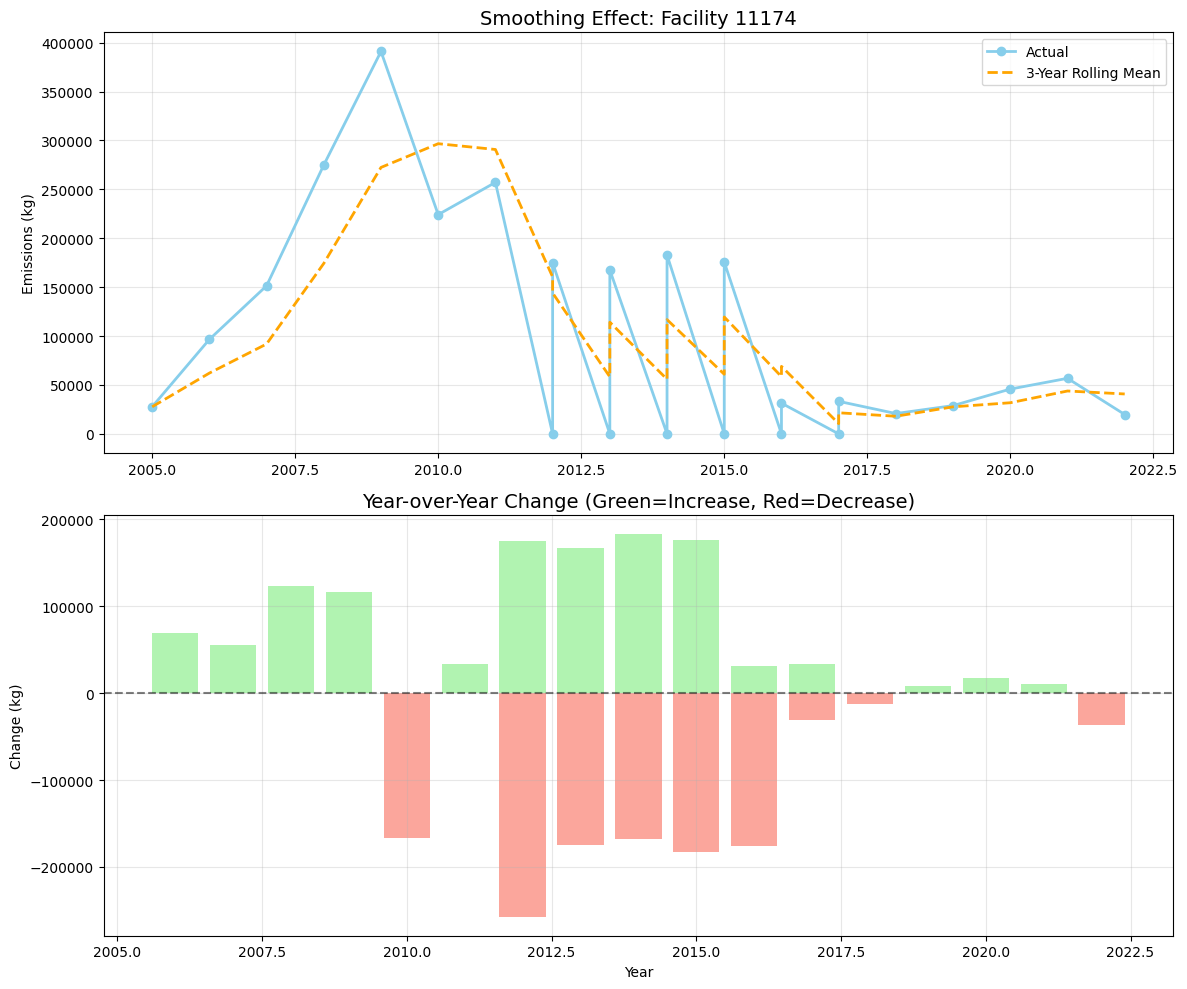

In [144]:

# Select a facility with plenty of history
sample_facility = df1['NPRI_ID'].value_counts().idxmax() #
sample_substance = df1[df1['NPRI_ID'] == sample_facility]['substance_name'].mode()[0] # [cite: 7]

# Filter data for this sample
sample_df = df1[(df1['NPRI_ID'] == sample_facility) &
                      (df1['substance_name'] == sample_substance)].copy()

# Setup Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Actual vs Rolling Means
ax1.plot(sample_df['reporting_year'], sample_df['total_release_all_kg'],
         marker='o', label='Actual', color='skyblue', linewidth=2)
ax1.plot(sample_df['reporting_year'], sample_df['rolling_mean_3yr'],
         label='3-Year Rolling Mean', color='orange', linestyle='--', linewidth=2) # [cite: 19]
ax1.set_title(f"Smoothing Effect: Facility {sample_facility}", color='black', fontsize=14)
ax1.set_ylabel("Emissions (kg)", color='black')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: YoY Change vs Momentum
# Positive bars (Green) = Increasing emissions, Negative (Red) = Decreasing
colors = ['lightgreen' if x > 0 else 'salmon' for x in sample_df['yoy_change']]
ax2.bar(sample_df['reporting_year'], sample_df['yoy_change'], color=colors, alpha=0.7) # [cite: 28]
ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
ax2.set_title("Year-over-Year Change (Green=Increase, Red=Decrease)", color='black', fontsize=14)
ax2.set_ylabel("Change (kg)", color='black')
ax2.set_xlabel("Year", color='black')
ax2.grid(True, alpha=0.3)

# Styling for dark theme
for ax in [ax1, ax2]:
    ax.tick_params(colors='black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

1. The visualization displays the raw annual emissions alongside the 3-Year Rolling Mean, which is used to reveal the long-term, stable trend by smoothing out year-to-year volatility.  

2. The lower plot shows the Year-over-Year Change, which captures the short-term momentum (acceleration or deceleration) of emissions, an immediate and powerful predictor for the next year's output.

## **7.2 Lag Features**

Visualizing Lag Features for Facility: 11174 (Substance: Carbon monoxide)


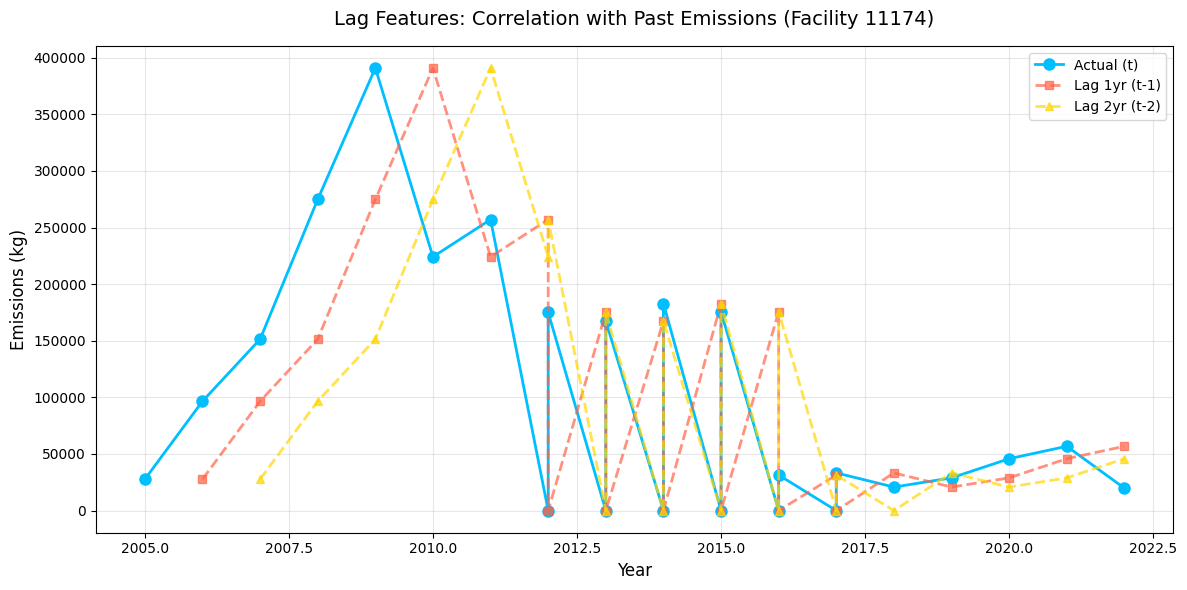

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Setup Sample ---
# Re-filter data for this sample (ensures variable presence)
sample_facility = df1['NPRI_ID'].value_counts().idxmax()
sample_substance = df1[df1['NPRI_ID'] == sample_facility]['substance_name'].mode()[0]

sample_df = df1[(df1['NPRI_ID'] == sample_facility) &
                      (df1['substance_name'] == sample_substance)].copy()
print(f"Visualizing Lag Features for Facility: {sample_facility} (Substance: {sample_substance})")


fig, ax = plt.subplots(figsize=(12, 6))
years = sample_df['reporting_year']

# Plot actual and lags
ax.plot(years, sample_df['total_release_all_kg'],
        marker='o', linewidth=2, markersize=8, label='Actual (t)', color='#00BFFF') # SkyBlue

ax.plot(years, sample_df['release_lag_1yr'],
        marker='s', linewidth=2, markersize=6, label='Lag 1yr (t-1)',
        color='#FF6347', alpha=0.7, linestyle='--') # Tomato

ax.plot(years, sample_df['release_lag_2yr'],
        marker='^', linewidth=2, markersize=6, label='Lag 2yr (t-2)',
        color='#FFD700', alpha=0.7, linestyle='--') # Gold

ax.set_xlabel('Year', fontsize=12, color='black')
ax.set_ylabel('Emissions (kg)', fontsize=12, color='black')
ax.set_title(f'Lag Features: Correlation with Past Emissions (Facility {sample_facility})',
             fontsize=14, color='black', pad=15)
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This visualization displays the strong autoregressive relationship where past emissions directly influence current emissions.  
The Lag Features ($t-1$, $t-2$) are simply shifted versions of the target variable.  
They serve as essential, high-correlation predictors because a facility's release behavior is highly dependent on its activity in the preceding years.

## **7.3 Rolling Features**



--- 10.6.2 Rolling Features ---


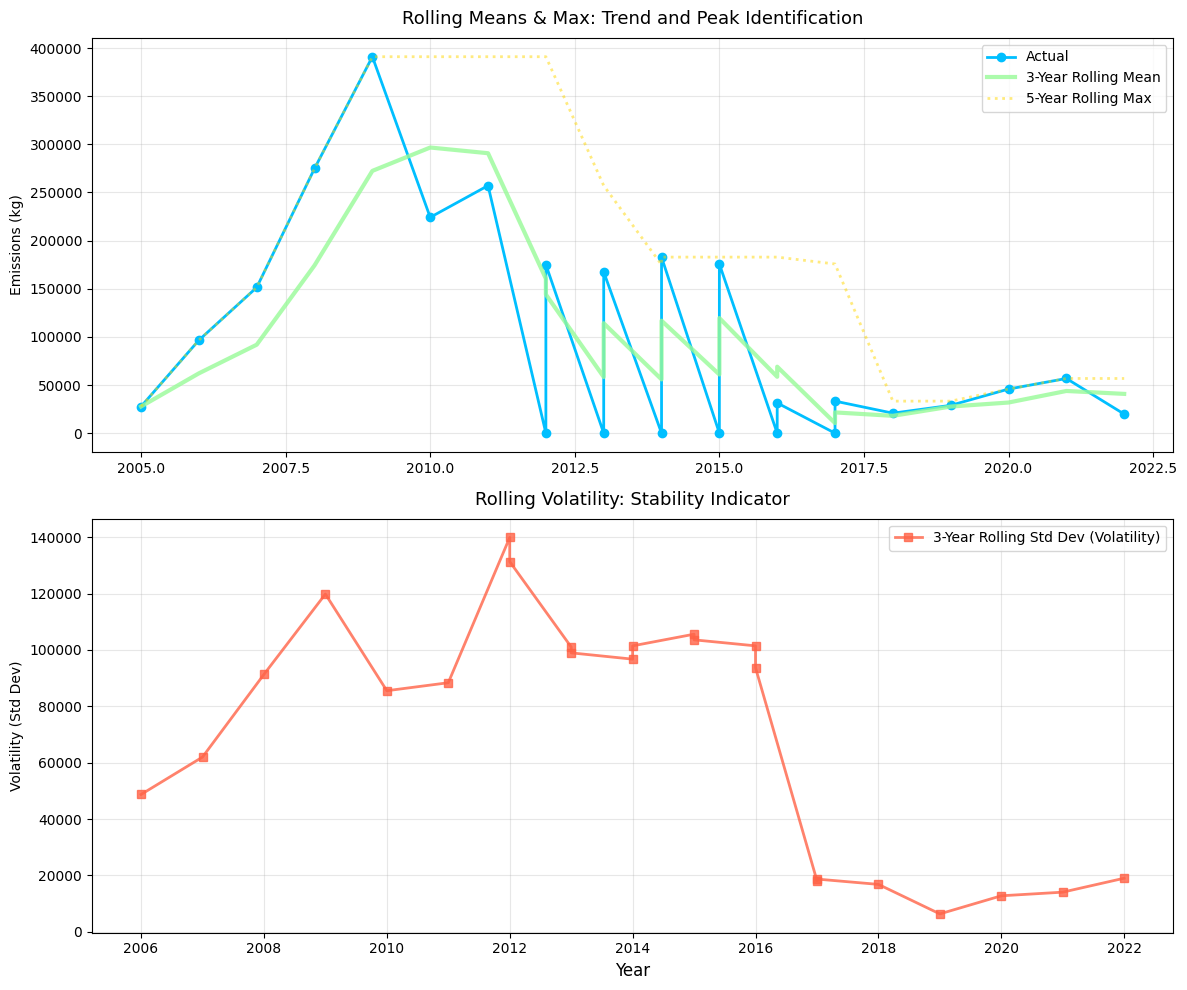

In [146]:

print("\n--- 10.6.2 Rolling Features ---")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Actual vs Rolling Means (Trend)
ax1.plot(sample_df['reporting_year'], sample_df['total_release_all_kg'],
         marker='o', linewidth=2, markersize=6, label='Actual', color='#00BFFF') # SkyBlue
ax1.plot(sample_df['reporting_year'], sample_df['rolling_mean_3yr'],
         linewidth=3, label='3-Year Rolling Mean', color='#98FB98', alpha=0.8) # PaleGreen
ax1.plot(sample_df['reporting_year'], sample_df['rolling_max_5yr'],
         linewidth=2, label='5-Year Rolling Max', color='#FFD700', alpha=0.5, linestyle=':') # Gold
ax1.set_ylabel('Emissions (kg)', color='black')
ax1.set_title('Rolling Means & Max: Trend and Peak Identification', fontsize=13, color='black', pad=10)
ax1.legend(loc='best', fontsize=10)
ax1.grid(alpha=0.3)

# Plot 2: Rolling Standard Deviation (Volatility)
ax2.plot(sample_df['reporting_year'], sample_df['rolling_std_3yr'],
         marker='s', linewidth=2, label='3-Year Rolling Std Dev (Volatility)',
         color='#FF6347', alpha=0.8) # Tomato
ax2.set_xlabel('Year', fontsize=12, color='black')
ax2.set_ylabel('Volatility (Std Dev)', color='black')
ax2.set_title('Rolling Volatility: Stability Indicator', fontsize=13, color='black', pad=10)
ax2.legend(loc='best', fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

This visualizations shows the long-term statistical properties of the emissions data.

1. Plot A uses the Rolling Mean to identify the stable trend and the Rolling Max to establish historical peak emission levels.
2. Plot B uses the Rolling Standard Deviation to measure volatility.  

High volatility indicates erratic or unpredictable emissions, providing the model with critical information about the facility's stability.

## **7.4 Trends and Momentum**

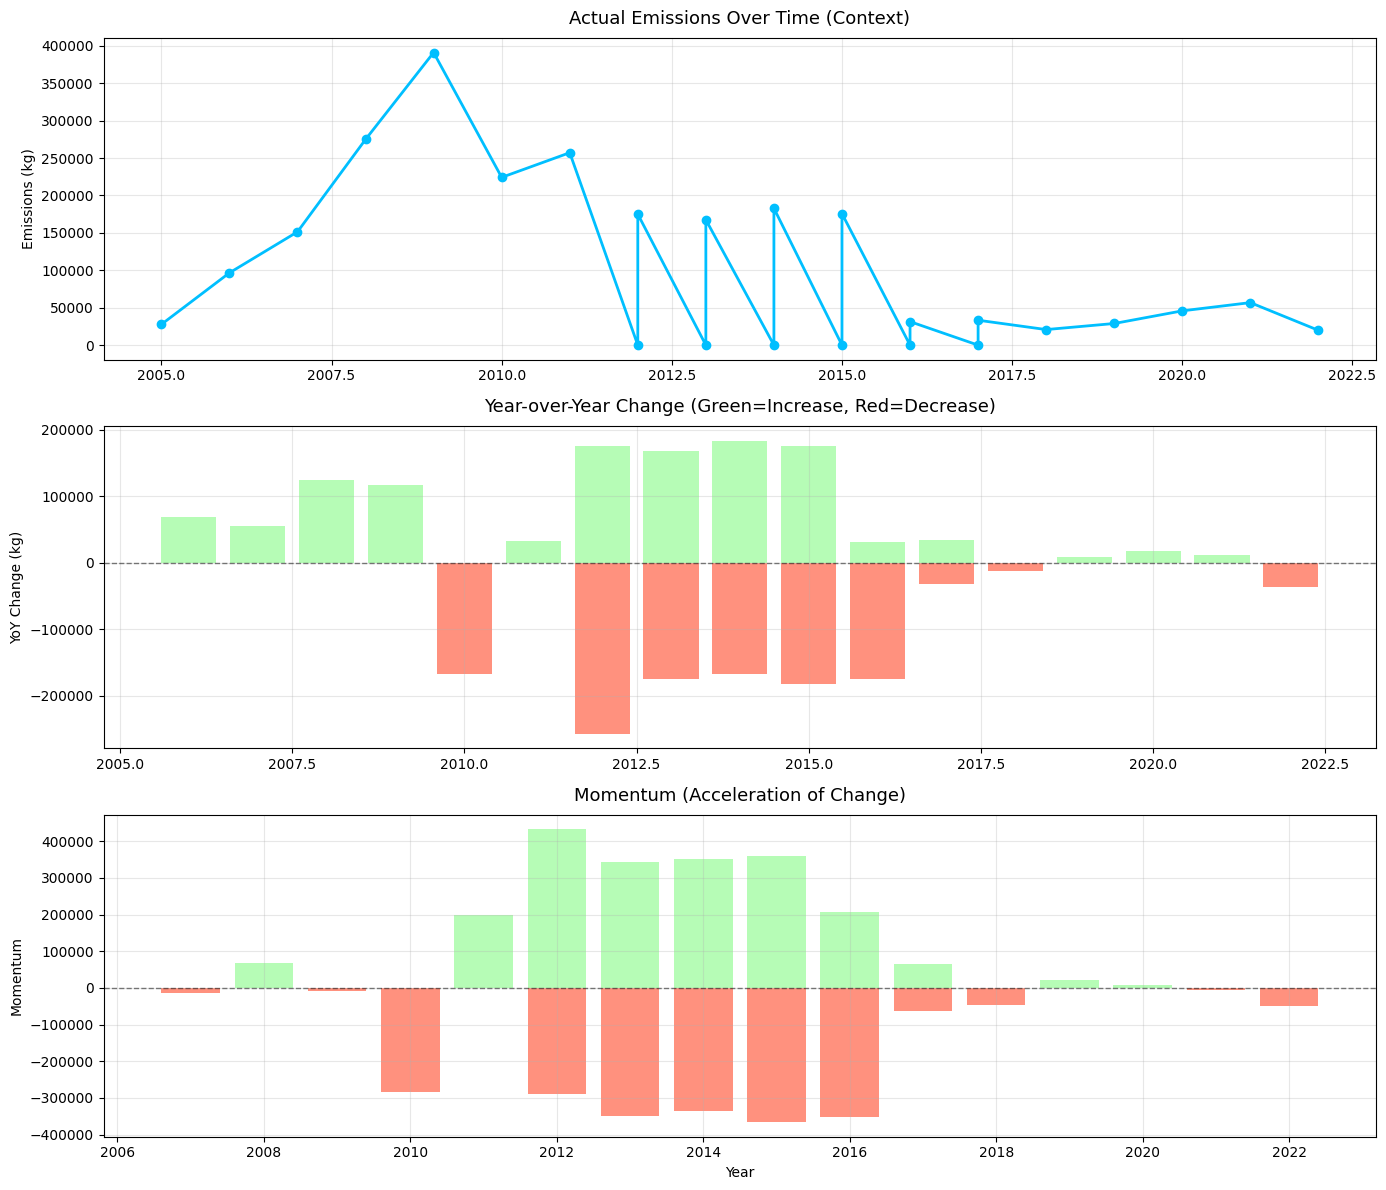

In [147]:
# --- Setup Sample (using the same facility/substance) ---
sample_df = df1[(df1['NPRI_ID'] == sample_facility) &
                      (df1['substance_name'] == sample_substance)].copy()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
years = sample_df['reporting_year']

# Plot 1: Actual emissions (Context)
ax1.plot(years, sample_df['total_release_all_kg'],
         marker='o', linewidth=2, markersize=6, color='#00BFFF')
ax1.set_ylabel('Emissions (kg)', color='black')
ax1.set_title('Actual Emissions Over Time (Context)', fontsize=13, color='black', pad=10)
ax1.grid(alpha=0.3)

# Plot 2: Year-over-year change
if 'yoy_change' in sample_df.columns:
    colors = ['#98FB98' if x > 0 else '#FF6347' for x in sample_df['yoy_change']]
    ax2.bar(years, sample_df['yoy_change'], color=colors, alpha=0.7)
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax2.set_ylabel('YoY Change (kg)', color='black')
    ax2.set_title('Year-over-Year Change (Green=Increase, Red=Decrease)',
                 fontsize=13, color='black', pad=10)
    ax2.grid(alpha=0.3)

# Plot 3: Momentum (acceleration)
if 'momentum' in sample_df.columns:
    momentum_colors = ['#98FB98' if x > 0 else '#FF6347' for x in sample_df['momentum']]
    ax3.bar(years, sample_df['momentum'], color=momentum_colors, alpha=0.7)
    ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax3.set_xlabel('Year', color='black')
    ax3.set_ylabel('Momentum', color='black')
    ax3.set_title('Momentum (Acceleration of Change)', fontsize=13, color='black', pad=10)
    ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

This visualization breaks down the time series into the level (Plot A), the velocity (YoY Change, Plot B), and the acceleration (Momentum, Plot C).  

The Momentum feature specifically captures how quickly the emissions change is itself changing. A high positive momentum means the emissions are increasing at an accelerating rate, which is a key signal for forecasting future growth or decline.

## **7.5 Coal Policy**


--- 10.6.4 Coal & Policy Interaction ---


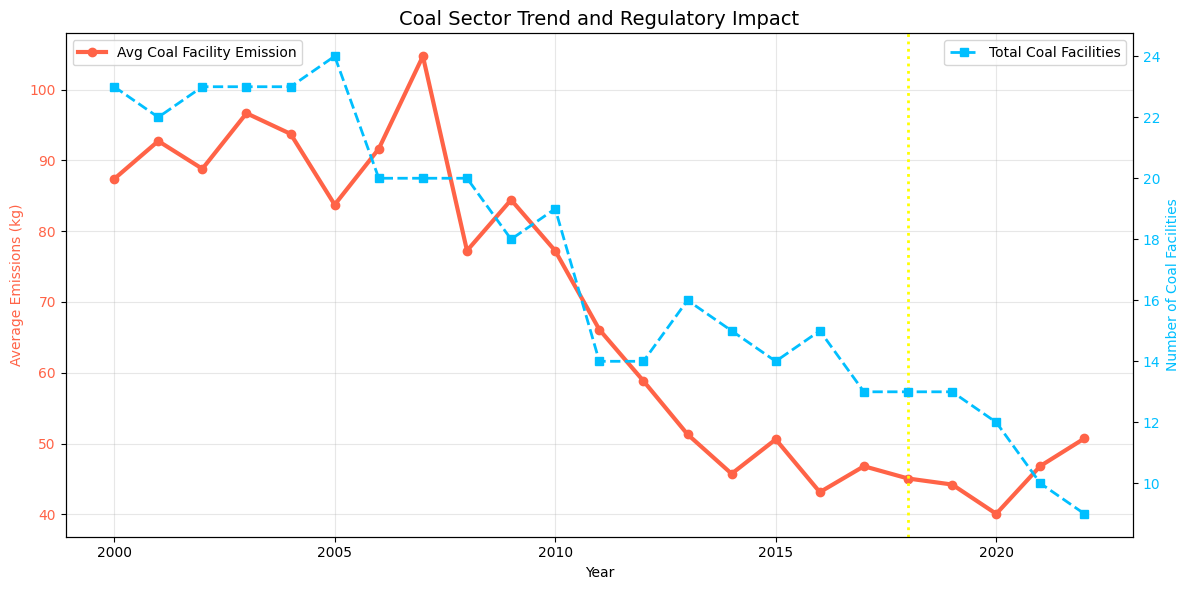

In [148]:

print("\n--- 10.6.4 Coal & Policy Interaction ---")
# Aggregate the average coal activity trend across all coal facilities
coal_trend = df1[df1['is_using_coal'] == 1].groupby('reporting_year').agg(
    Avg_Release=('total_release_all_kg', 'mean'),
    Coal_Count=('NPRI_ID', 'nunique'),
    Avg_YoY_Change=('yoy_change', 'mean')
).reset_index()

# Setup Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1: Average Emissions Trend (Coal)
color = '#FF6347'
ax1.set_xlabel('Year', color='black')
ax1.set_ylabel('Average Emissions (kg)', color=color)
ax1.plot(coal_trend['reporting_year'], coal_trend['Avg_Release'],
         marker='o', linewidth=3, label='Avg Coal Facility Emission', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second axis for policy impact (Coal Count)
ax2 = ax1.twinx()
color = '#00BFFF'
ax2.set_ylabel('Number of Coal Facilities', color=color)
ax2.plot(coal_trend['reporting_year'], coal_trend['Coal_Count'],
         marker='s', linewidth=2, label='Total Coal Facilities', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Add vertical line for 2018 (Canada Coal Phase-out Plan)
ax1.axvline(x=2018, color='yellow', linestyle=':', linewidth=2, label='Policy: 2018 Plan')

ax1.set_title('Coal Sector Trend and Regulatory Impact', fontsize=14, color='black')
ax1.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This plot explicitly connects the aggregated emissions trend for coal-using facilities (red line) with the Canadian Coal Phase-out Plan policy year (2018, yellow line).  

Observing the behavior of emissions and the number of facilities before and after 2018 allows the model to learn the regulatory effect.  

This feature helps the model predict how the sector will behave under the future phase-out scenario by 2030, directly addressing the problem objective.

# **8. Data Methodology & Pipeline Overview**

## **8.1 This section outlines the feature engineering, data splitting, and preprocessing strategies used to prepare the NPRI dataset for modeling.**

---

### **1. Feature Selection & Target Definition**

#### **The Target**
We defined our target variable as `total_release_all_kg`. This represents the aggregate release across all relevant substance columns.

#### **The Coal Flag (`is_coal`)**
We engineered a binary flag to identify coal power plants based on substance composition and emission magnitude.

* **Logic:** `substance_name` contains "mercury" **AND** `total_release_all_kg` $\ge 5$.
* **Purpose:** Coal plants have distinct high-mercury emission profiles. This flag allows us to simulate specific "Coal Phase-out" scenarios.

> ** Critical Note on Data Leakage**
> Since `is_coal` is derived from the target variable (`total_release_all_kg`), it is **strictly excluded** from the model input features. It is used *only* for filtering data during training and for post-prediction analysis.

---

### **2. Data Splitting Strategy**

To respect the temporal nature of the data, we utilized a **Chronological Split** rather than a random shuffle.

#### **The Split**
* **Training Set:** Historical data (Earlier years)
* **Testing Set:** Recent data (Later years)

#### **Coal Filtration**
To avoid bias and simulate phase-out scenarios, we applied specific filters:
* **Training:** We created `X_train_without_coal` by removing coal plants. The model learns baseline industrial patterns without the skew of heavy coal emitters.
* **Testing:** We retain flexibility to test on both non-coal plants and the full dataset.

```python
target = 'total_release_all_kg'

# 1. Standard Chronological Split
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test  = test_df.drop(columns=[target])
y_test  = test_df[target]

# 2. Filter Coal out of Training ONLY
X_train_without_coal = X_train[X_train["IsCoal"] == 0]
y_train_without_coal = y_train.loc[X_train_without_coal.index]

# 3. Drop IsCoal flag to prevent leakage
X_train = X_train.drop(columns=["IsCoal"])
X_test  = X_test.drop(columns=["IsCoal"])
X_train_without_coal = X_train_without_coal.drop(columns=["IsCoal"])
```
---
### **3. Feature Engineering & Chronological Sorting**
Before preprocessing, we engineered time-based features to capture trends and momentum.

* Sorting: Data was sorted by NPRI ID, substance_name, and reporting_year to ensure accurate lag calculation.

* New Features:

  * Lags: `release_lag_1yr`, `release_lag_2yr`
  * Rolling Stats: `rolling_mean_3yr`, `rolling_std_3yr`
  * Temporal Markers: `years_since_2000`, `post_2015`, `post_2018`
  * Momentum: Year-over-Year (YoY) changes and cumulative releases.
---
### **4. Preprocessing Pipeline (NPRIProcessor)**
  
We implemented a custom scikit-learn Transformer to standardize data cleaning and transformation. This ensures the exact same logic is applied to Train and Test sets.

| Step | Action | Detail |
| :--- | ---: | :---: |
| 1. Cleaning | Drop Units | Rows with unconvertible units (e.g., g TEQ) are removed. |
| 2. Imputation | Fill Missing | Releases $\rightarrow$ 0; Employees $\rightarrow$ Median.|
| 3. Outliers | Capping | Extreme values capped at the 99th percentile.|
| 4. Transform| Log & Scale | Log-transform skewed features; Standard scale numeric features.|
| 5. Encoding | One-Hot| Categorical features (`province`, `est_method`) are one-hot encoded.|

- **Note:** Boolean flags (e.g., `is_declining`, `post_2015`) are passed through raw, as they do not require scaling.
---
### **5. Computing Total Releases**
To ensure data integrity, the target variable was computed by summing all release columns.
```python
# Summing horizontally.
# If all values are NaN, result is 0.0 (via skipna=True)
df1['total_release_all_kg'] = df1[release_cols].sum(axis=1, skipna=True)
```
* **Why:** Prevents mislabeling rows as NaN and ensures a continuous numeric target for regression.

---
### **6. Scenario Analysis and Summary**

**Filtering Coal for Scenario Analysis**

We structured our pipeline to allow "Scenario Analysis":

 * **Training Phase**: Filtered out coal plants so the model learns the behavior of standard industries.
 * **Testing Phase**: We can feed coal plants into the model (with modifications) or non-coal plants to test general accuracy.

    This allows us to answer the question: *"If coal plants behaved like standard industries (or were phased out), what would emissions look like?"*
---
### **Summary**

* Target: `total_release_all_kg`

* Leakage Prevention: `is_coal` used for filtering only; Chronological splitting used.

* Preprocessing: Robust pipeline handling outliers, missing values, and scaling.

* Goal: A model trained on non-coal behavior that can accurately predict emissions for scenario analysis (e.g., Coal Phase-out).

# **9. Pipeline**

## 9.1 NPRI Processor  

The NPRIProcessor is a custom transformer responsible for comprehensive data cleaning, feature engineering, and scaling.  
It handles imputation, outlier capping, log transformation, standardization of numeric features, and one-hot encoding of categorical features, ensuring data is model-ready.


In [149]:
class NPRIProcessor(BaseEstimator, TransformerMixin):
    """
    End-to-end preprocessing for the NPRI releases -> model-ready dataset.
    - Filters to NAICS_code (default '221112') inside transformer.
    - Drops rows with non-convertible units (e.g., GTEQ).
    - Imputes releases with 0; employees_number with median.
    - Capping using training 99th percentile on selected columns.
    - Adds total_release (sum of specified release columns).
    - Applies log1p to chosen columns.
    - Scales numeric features (StandardScaler).
    - One-hot encodes chosen categorical columns (province, est_method).
    Returns a pandas.DataFrame with features.
    """

    def __init__(
        self,
        units_to_drop=None,
        coal_keyword='mercury',
        release_cols=None,
        median_impute_cols=None,
        zero_impute_cols=None,
        cap_cols=None,
        cap_quantile=0.99,
        log_cols=None,
        numeric_scale_cols=None,
        categorical_cols=None,
        drop_cols=None,
        keep_cols_extra=None
    ):



        # Behavior selectors
        self.units_to_drop = units_to_drop if units_to_drop is not None else ['g TEQ']  # drop GTEQ by default
        self.coal_keyword = coal_keyword.lower()

        # Column groups
        # Example placeholders - override when instantiating
        self.release_cols = release_cols or [
        'rta_fugitive', 'rta_other_non_point', 'rta_road_dust', 'rta_spills',
        'rta_stack_point', 'rta_storage_handling', 'rtl_leaks', 'rtl_other',
        'rtl_spills', 'rtwb_direct_discharges', 'rtwb_leaks', 'rtwb_spills'
        ]
        self.median_impute_cols = median_impute_cols or ['employees_number']
        self.zero_impute_cols = zero_impute_cols or self.release_cols.copy()
        self.cap_cols = cap_cols or ['employees_number',
                                     'rta_other_non_point',
                                    'rtl_other',
                                     'rtl_spills',
                                     'rtwb_spills']   # columns to percentile-cap
        self.cap_quantile = cap_quantile

        self.log_cols = log_cols or ['rta_fugitive',
                                     'rta_stack_point',
                                    'rtwb_direct_discharges',
                                     'sum_release2all']   # columns to log1p

        self.numeric_scale_cols = numeric_scale_cols or ['rta_fugitive',
                                                         'rta_other_non_point',
                                                         'rta_road_dust',
                                                         'rta_spills',
                                                         'rta_stack_point',
                                                         'rta_storage_handling',
                                                         'rtl_leaks',
                                                         'rtl_other',
                                                         'rtl_spills',
                                                         'rtwb_direct_discharges',
                                                         'rtwb_leaks',
                                                         'rtwb_spills',
                                                         'employees_number',
                                                         'release_lag_1yr',
                                                         'release_lag_2yr',
                                                         'release_lag_3yr',
                                                         'rolling_mean_3yr',
                                                         'rolling_std_3yr',
                                                         'rolling_max_3yr',
                                                         'rolling_mean_5yr',
                                                         'rolling_std_5yr',
                                                         'rolling_max_5yr',
                                                         'yoy_change',
                                                         'yoy_pct_change',
                                                         'momentum',
                                                         'cumulative_release',
                                                         'years_since_2000']  # numeric columns to scale after imputation and total_release

        self.categorical_cols = categorical_cols or ['province',
                                                     'est_method'
                                                                  ]

        self.drop_cols = drop_cols or ['sum_release2all']  # columns to drop early if present

        self.keep_cols_extra = keep_cols_extra or [	  'is_declining',
                                                      'post_2015',
                                                      'post_2018',
                                                      'Replacement_Release_kg']  # any extra columns to carry forward unchanged

        # internal objects to be computed on fit
        self.median_values_ = {}
        self.cap_upper_ = {}
        self.scaler_ = None
        self.ohe_ = None
        self.ohe_feature_names_ = []
        self.fitted_ = False

    # ---------- fit ----------
    def fit(self, X: pd.DataFrame, y=None):
        df = X.copy()



        # 3) Compute median for median_impute_cols
        for col in self.median_impute_cols:
            if col in df.columns:
                self.median_values_[col] = df[col].median()
            else:
                self.median_values_[col] = 0.0  # fallback

        # 4) Compute percentile upper bound for cap_cols
        for col in self.cap_cols:
            if col in df.columns:
                self.cap_upper_[col] = df[col].quantile(self.cap_quantile)
            else:
                self.cap_upper_[col] = None

        # 5) Fit scaler on numeric_scale_cols (need to impute first for fit)
        numeric_for_scaling = []
        for col in self.numeric_scale_cols:
            if col in df.columns:
                numeric_for_scaling.append(col)

        if numeric_for_scaling:
            # create a temp df copy and impute median or 0 for fitting scaler
            tmp = df[numeric_for_scaling].copy()
            for col in tmp.columns:
                if col in self.median_values_:
                    tmp[col] = tmp[col].fillna(self.median_values_[col])
                elif col in self.zero_impute_cols:
                    tmp[col] = tmp[col].fillna(0)
                else:
                    tmp[col] = tmp[col].fillna(0)
            self.scaler_ = StandardScaler().fit(tmp)
        else:
            self.scaler_ = None

        # 6) Fit one-hot encoder for categorical columns
        cat_cols_for_ohe = [c for c in self.categorical_cols if c in df.columns]
        if cat_cols_for_ohe:
            # Convert to object dtype first to allow adding new string 'UNKNOWN'
            cat_df = df[cat_cols_for_ohe].astype(object).fillna('UNKNOWN').astype(str)
            self.ohe_ = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            self.ohe_ = self.ohe_.fit(cat_df)
            # build feature names
            ohe_names = []
            try:
                ohe_names = list(self.ohe_.get_feature_names_out(cat_cols_for_ohe))
            except Exception:
                # fallback
                for i, c in enumerate(cat_cols_for_ohe):
                    cats = self.ohe_.categories_[i]
                    ohe_names.extend([f"{c}__{cat}" for cat in cats])
            self.ohe_feature_names_ = ohe_names
        else:
            self.ohe_ = None
            self.ohe_feature_names_ = []

        self.fitted_ = True
        return self

    # ---------- transform ----------
    def transform(self, X: pd.DataFrame, y=None):
        if not self.fitted_:
            raise RuntimeError("NPRIProcessor must be fitted before transform(). Call fit(X) first.")

        df = X.copy()

        # Safety: ensure all column names expected are present even if missing (fill with NaN)
        # (this helps when users didn't pass exact columns)
        for c in set(self.median_impute_cols + self.zero_impute_cols + self.cap_cols + self.log_cols +
                     self.numeric_scale_cols + self.categorical_cols + self.release_cols + self.keep_cols_extra):
            if c not in df.columns:
                df[c] = np.nan


        # 2) Drop rows with units we cannot convert (GTEQ) - we already decided to remove them
        if 'units' in df.columns and self.units_to_drop:
            df = df[~df['units'].isin(self.units_to_drop)].copy()


        # 4) Impute releases with 0
        for col in self.zero_impute_cols:
            if col in df.columns:
                df[col] = df[col].fillna(0)

        # 5) Impute median cols (employees_number) with stored median
        for col in self.median_values_:
            if col in df.columns:
                df[col] = df[col].fillna(self.median_values_[col])

        # 6) Cap selected columns using fitted percentiles
        for col, upper in self.cap_upper_.items():
            if upper is not None and col in df.columns:
                df[col] = df[col].mask(df[col] > upper, upper)



        # 8) Log-transform selected columns (log1p)
        for col in self.log_cols:
            if col in df.columns:
                # ensure non-negative prior to log (should be, since releases >= 0)
                df[col] = np.log1p(df[col].clip(lower=0).astype(float))

        # 9) Prepare numeric features for scaling
        numeric_present = [c for c in self.numeric_scale_cols if c in df.columns]
        numeric_array = np.zeros((len(df), 0))
        if numeric_present:
            num_df = df[numeric_present].copy()
            # fill remaining NaNs defensively
            for col in num_df.columns:
                if col in self.median_values_:
                    num_df[col] = num_df[col].fillna(self.median_values_[col])
                elif col in self.zero_impute_cols:
                    num_df[col] = num_df[col].fillna(0)
                else:
                    num_df[col] = num_df[col].fillna(0)
            if self.scaler_ is not None:
                numeric_array = self.scaler_.transform(num_df)
            else:
                numeric_array = num_df.values

        # 10) Encode categorical columns with fitted OHE
        cat_present = [c for c in self.categorical_cols if c in df.columns]
        cat_array = np.zeros((len(df), 0))
        if self.ohe_ is not None and cat_present:
            # Convert to object dtype first to allow adding new string 'UNKNOWN'
            cat_df = df[cat_present].astype(object).fillna('UNKNOWN').astype(str)
            cat_array = self.ohe_.transform(cat_df)
        elif cat_present:
            # fallback: simple label as string columns (not ideal for linear model but safe)
            # Convert to object dtype first to allow adding new string 'UNKNOWN'
            cat_array = df[cat_present].astype(object).fillna('UNKNOWN').astype(str).values

        # 11) Build final DataFrame: numeric_scaled + ohe features + any extras + is_coal
        feature_names = []
        final_arrays = []

        # Numeric columns (scaled) -> names same as numeric_present
        if numeric_present:
            feature_names.extend(numeric_present)
            final_arrays.append(numeric_array)

        # OHE columns -> using stored feature names
        if self.ohe_ is not None and len(self.ohe_feature_names_) > 0:
            feature_names.extend(self.ohe_feature_names_)
            final_arrays.append(cat_array)
        elif cat_present:
            # fallback: keep original categorical names (string) - as single columns each
            feature_names.extend(cat_present)
            final_arrays.append(cat_array)

        # keep extra raw columns if specified
        if self.keep_cols_extra:
            extras = [c for c in self.keep_cols_extra if c in df.columns]
            if extras:
                feature_names.extend(extras)
                final_arrays.append(df[extras].values)

        # Creating my final X dataframe
        if final_arrays:
            X_final = np.hstack(final_arrays)
        else:
            # nothing to concatenate (shouldn't happen) - make empty DF
            X_final = np.zeros((len(df), 0))

        # Construct DataFrame
        df_out = pd.DataFrame(X_final, columns=feature_names, index=df.index)

        # If any numeric columns were kept as strings in fallback, try to coerce them to numeric where possible
        for col in df_out.columns:
            df_out[col] = pd.to_numeric(df_out[col], errors='ignore')

        # Return DataFrame (model-ready): features
        return df_out

    # convenience method - run fit_transform to get model-ready dataframe
    def fit_transform(self, X: pd.DataFrame, y=None):
        return self.fit(X, y).transform(X, y)

## 9.2 Preparing Data for Correlation

We're running a preliminary fit-transform on X_train using the NPRIProcessor.  
This is done ONLY to generate the full set of processed features and calculate correlations for our initial filter (Method 1).  
The data sets generated here (X_train_processed, X_test_processed_full) are strictly for analysis, not for the final model fit.

In [150]:
class FixedFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Custom transformer to select a fixed list of features determined
    via external analysis (e.g., the Correlation Filter).
    """
    def __init__(self, feature_list):
        self.feature_list = feature_list

    def fit(self, X, y=None):
        # The list is pre-calculated; nothing new to learn.
        if not set(self.feature_list).issubset(set(X.columns)):
            missing = list(set(self.feature_list) - set(X.columns))
            raise ValueError(f"Input X is missing features required by selector: {missing}")
        return self

    def transform(self, X):
        # Applies the fixed list to the incoming data (X_train & X_test)
        return X[self.feature_list]

## 9.3 External Feature Analysis: Multicollinearity and Correlation Filter (Method 1)

Before any model-based selection, we calculate the correlation matrix for all features that survived preprocessing.  
The heatmap helps us visually identify highly correlated feature pairs (multicollinearity), which can destabilize our linear model.

In [151]:
# 1. Temporarily fit and transform X_train using NPRI processor
# This is safe as it only uses X_train for learning and transformation.
analysis_processor = NPRIProcessor()

#ADD NEW FEATURE TO keep_cols_extra FOR ANALYSIS ---
analysis_processor = NPRIProcessor(
    keep_cols_extra=[
        'is_declining',
        'post_2015',
        'post_2018',
        'Replacement_Release_kg'
    ]
)
X_train_processed = analysis_processor.fit_transform(X_train, y_train)

# NOTE: We keep a copy of the fully processed X_test just for future analysis/comparison,
# but the final model will use the pipeline for transformation.
X_test_processed_full = analysis_processor.transform(X_test_without_coal)

print(f"X_train_processed shape (Full Feature Set): {X_train_processed.shape}")

/tmp/ipython-input-3628374230.py:279: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
/tmp/ipython-input-3628374230.py:279: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


X_train_processed shape (Full Feature Set): (18757, 53)


### 9.3.1 Feature Exploration and Correlation

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


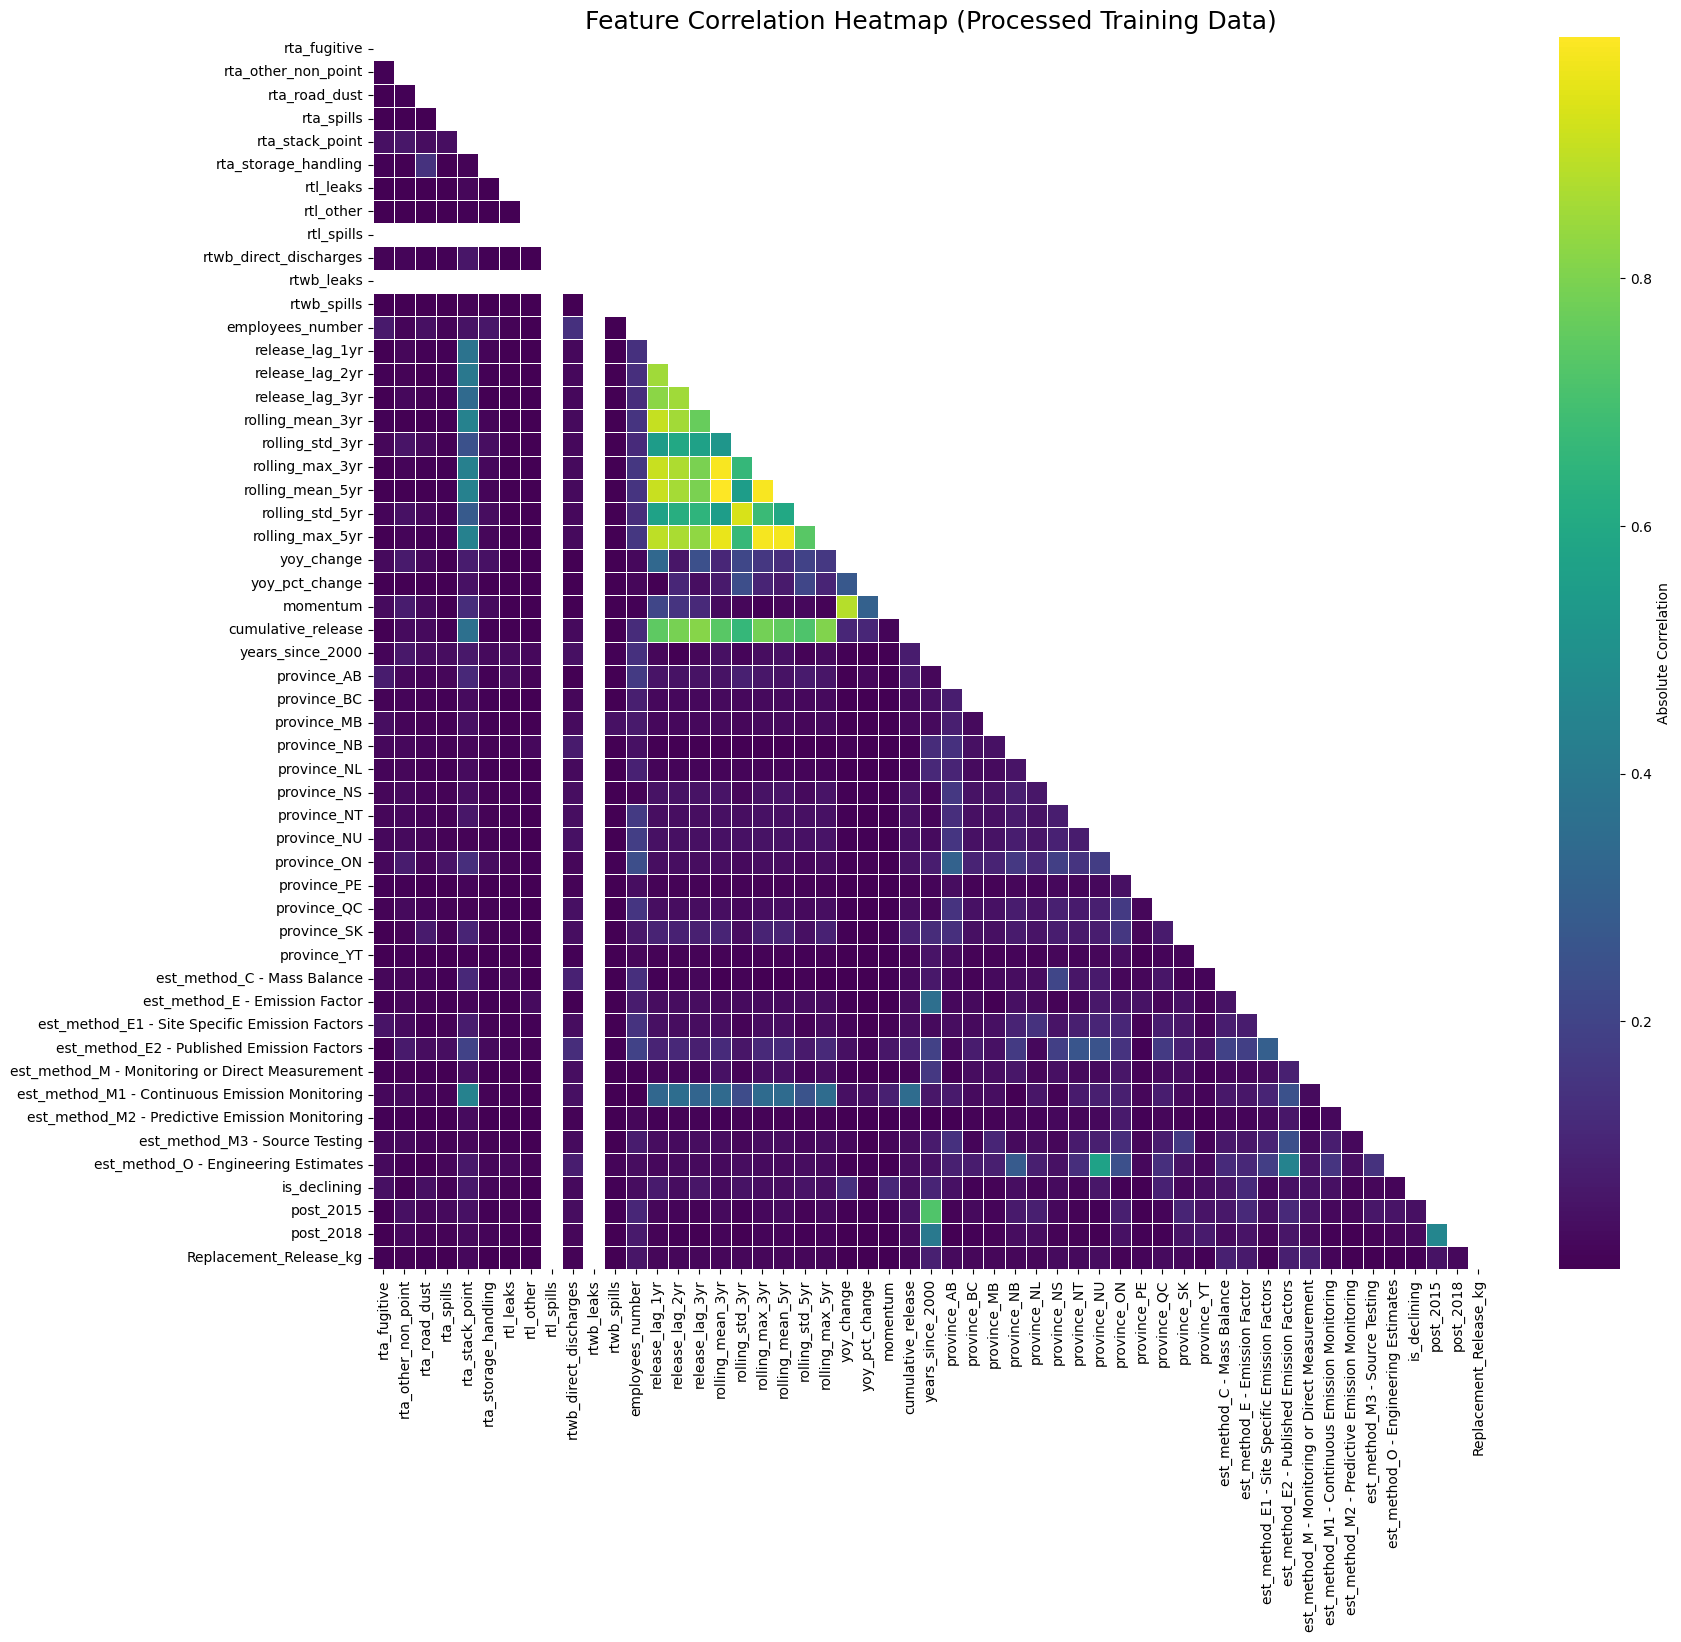

In [152]:
# Calculate Correlation Matrices
corr_matrix = X_train_processed.corr().abs()
# Calculate correlation to target for tie-breaking
target_corr = X_train_processed.corrwith(y_train).abs().sort_values(ascending=False)

# 4.2.1 Plotting Correlation Heatmap
plt.figure(figsize=(18, 16))
# Create a mask for the upper triangle for cleaner visualization
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            cmap='viridis',
            linewidths=.5,
            mask=mask, # Apply the mask
            annot=False,
            cbar_kws={'label': 'Absolute Correlation'})
plt.title('Feature Correlation Heatmap (Processed Training Data)', fontsize=18)
plt.show()

### 9.3.2 Analyzing Multicollinearity and Executing Method 1 of Feature Selection  

Implementing the Fixed Correlation Filter (Method 1) to address multicollinearity by identifying feature pairs with an absolute correlation of 0.90 or greater.  
For each highly correlated pair, the feature less correlated with the target variable is dropped, resulting in the stable, refined features_corr_selected list for subsequent modeling steps.

Highly Correlated Pairs (|r| >= 0.90) found: 10


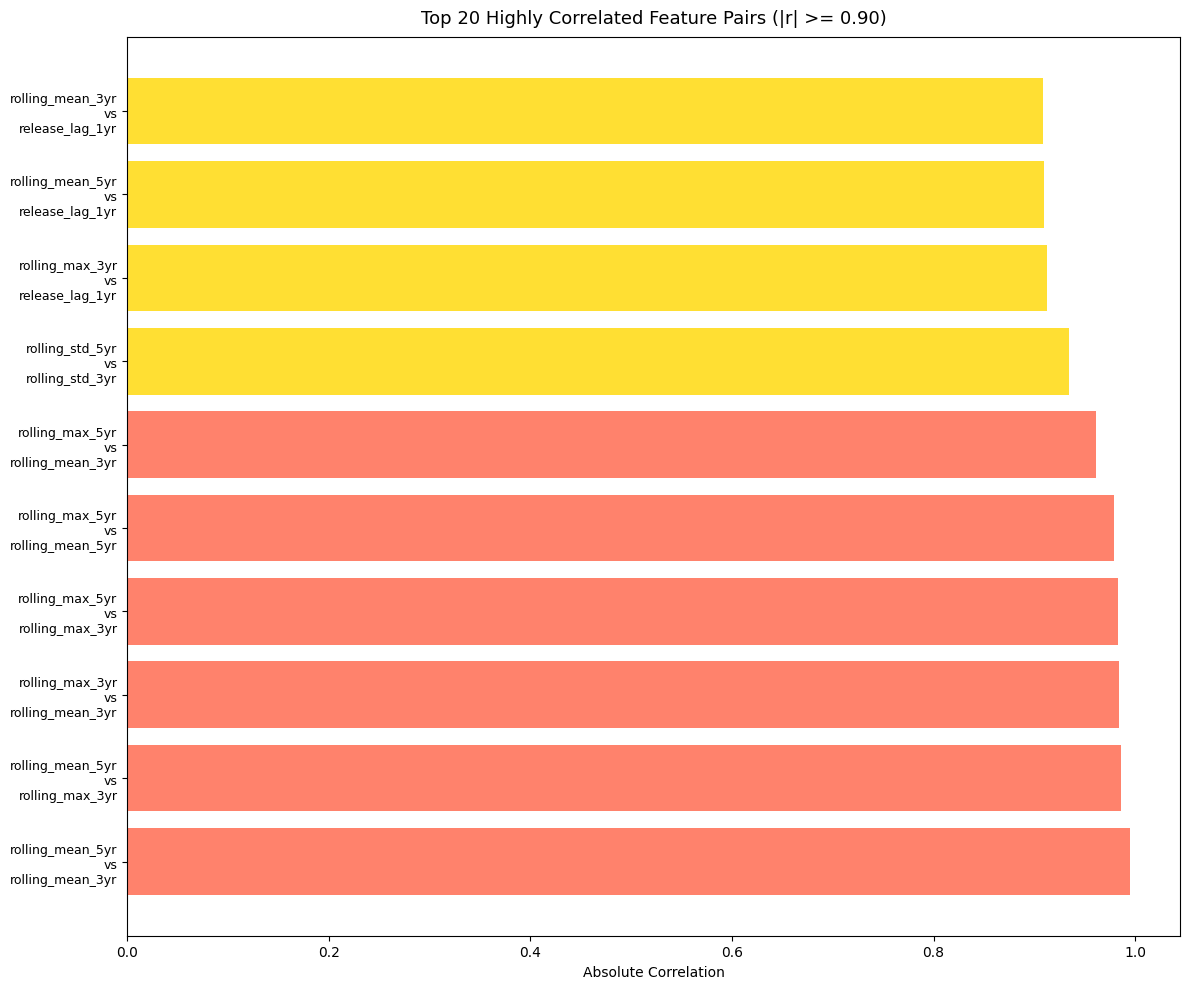

Features selected by Method 1 (fixed list): 48
Features dropped by Method 1: 5


In [153]:

# 1. Prepare Multicollinearity DataFrame (Upper triangle of corr_matrix, excluding diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
multicollinearity_df = upper.unstack().sort_values(ascending=False).dropna().reset_index()
multicollinearity_df.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter for pairs above the 0.90 threshold
multicollinearity_df = multicollinearity_df[multicollinearity_df['Correlation'] >= 0.90]

print(f"Highly Correlated Pairs (|r| >= 0.90) found: {len(multicollinearity_df)}")

# 2. Plot Multicollinearity Bars (Top 20 pairs)
if len(multicollinearity_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 10))
    pairs_to_plot = multicollinearity_df.head(20) # Limit to top 20 for readability

    feature_pairs = [f"{row['Feature_1']}\nvs\n{row['Feature_2']}"
                     for _, row in pairs_to_plot.iterrows()]

    colors_mult = ['#FF6347' if abs(x) > 0.95 else '#FFD700'
                   for x in pairs_to_plot['Correlation'].values]

    ax.barh(range(len(pairs_to_plot)),
            pairs_to_plot['Correlation'].abs().values,
            color=colors_mult,
            alpha=0.8)

    ax.set_yticks(range(len(pairs_to_plot)))
    ax.set_yticklabels(feature_pairs, fontsize=9)
    ax.set_title('Top 20 Highly Correlated Feature Pairs (|r| >= 0.90)', fontsize=13, color='black', pad=10)
    ax.set_xlabel('Absolute Correlation')
    plt.tight_layout()
    plt.show()

# 3. Execute Multicollinearity Removal Logic
features_to_drop = set()
features_corr_selected = list(X_train_processed.columns)

for idx, row in multicollinearity_df.iterrows():
    f1 = row['Feature_1']
    f2 = row['Feature_2']

    # Check if neither feature has already been marked for dropping
    if f1 not in features_to_drop and f2 not in features_to_drop:
        # Keep the one with higher absolute correlation to the target (for tie-breaking)
        corr1 = target_corr.get(f1, 0)
        corr2 = target_corr.get(f2, 0)

        if corr1 >= corr2:
            features_to_drop.add(f2)
            if f2 in features_corr_selected: features_corr_selected.remove(f2)
        else:
            features_to_drop.add(f1)
            if f1 in features_corr_selected: features_corr_selected.remove(f1)

# The list features_corr_selected is now the FIXED result of Method 1
print(f"Features selected by Method 1 (fixed list): {len(features_corr_selected)}")
print(f"Features dropped by Method 1: {len(features_to_drop)}")

### 9.3.3 Building and Fitting the data into the pipeline


The final Pipeline integrates preprocessing and three sequential feature selection methods (Filter, Wrapper, and Embedded) to refine the feature set before training the final LinearRegression model.  
This multi-step approach prevents data leakage and ensures features are transformed correctly before selection.

**Preprocessor:** NPRIProcessor (Cleaning, Scaling, OHE).

**Filter Method:** FixedFeatureSelector (Applies the fixed list from correlation analysis, Method 1).

**Wrapper Method:** RFE (Recursive Feature Elimination) with LinearRegression (Method 3).

**Embedded Method:** SelectFromModel with LassoCV (L1-regularization based selection, Method 5).

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LinearRegression, LassoCV

# Create an instance of the fixed selector using the result from Method 1
correlation_selector_instance = FixedFeatureSelector(features_corr_selected)

print("\n--- 4.3 Feature Selection and Final Pipeline (Integrated) ---")
# The Pipeline structure ensures all preprocessing and selection steps run
# sequentially and prevent data leakage.

final_modeling_pipeline = Pipeline(steps=[
    # 1. Preprocessor (Cleans, scales, OHE, and creates all engineered features)
    ('preprocessor', NPRIProcessor(
        keep_cols_extra=[
            'is_declining',
            'post_2015',
            'post_2018',
            'Replacement_Release_kg'
        ]
    )),

    # 2. Filter Method (Method 1): Applies the FIXED list from the external analysis
    # This reduces the feature space before the complex model-based methods run.
    ('correlation_filter_fixed', correlation_selector_instance),

    # 3. Wrapper Method (RFE): Reduces features from the filtered set
    ('rfe_selection', RFE(
        estimator=LinearRegression(),
        n_features_to_select=25, # to modify
        step=1)
    ),

    # 4. Embedded Method (Lasso): Refines selection based on L1 regularization
    ('lasso_selection', SelectFromModel(
        estimator=LassoCV(cv=5, max_iter=10000, random_state=42),
        threshold='median') # Selects features with coefficients above the median
    ),

    # 5. Final Model
    #('final_model', LinearRegression()) #This has not been decided, just a placeholder
])

print("\n--- 4.4 Fitting Final Modeling Pipeline ---")
# This fit runs the entire sequence: Process -> Filter -> RFE -> Lasso -> Train Model
final_modeling_pipeline.fit(X_train,y_train)

print("Pipeline fitted successfully. The final feature set is dynamically refined within the pipeline.")


--- 4.3 Feature Selection and Final Pipeline (Integrated) ---

--- 4.4 Fitting Final Modeling Pipeline ---


/tmp/ipython-input-3628374230.py:279: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Pipeline fitted successfully. The final feature set is dynamically refined within the pipeline.


## 9.4 Extracting the Final Selected Features

Extracting the final list of selected features by sequentially applying the filtering masks from the three feature selection steps completed before.
Just to understand, not to be use by the model

In [155]:
# 1. Get the feature list *after* the Fixed Correlation Filter (Method 1)
fixed_filter_features = final_modeling_pipeline.named_steps['correlation_filter_fixed'].feature_list

# 2. Get the feature list *after* RFE (Method 3)
rfe_selector = final_modeling_pipeline.named_steps['rfe_selection']
rfe_mask = rfe_selector.support_

# Apply the RFE mask to the features that survived the Fixed Filter
features_after_rfe = [
    feature
    for feature, is_selected in zip(fixed_filter_features, rfe_mask)
    if is_selected
]

# 3. Get the feature list *after* Lasso (Method 5)
lasso_selector = final_modeling_pipeline.named_steps['lasso_selection']
lasso_mask = lasso_selector.get_support()

# Apply the Lasso mask to the features that survived RFE
final_selected_features = [
    feature
    for feature, is_selected in zip(features_after_rfe, lasso_mask)
    if is_selected
]

print(f"Result: Features after Fixed Filter (Method 1): {len(fixed_filter_features)}")
print(f"Result: Features after RFE (Method 3): {len(features_after_rfe)}")
print(f"Result: FINAL Features used by Model (After Lasso/Method 5): {len(final_selected_features)}")
print("\nTeam, this is our Final Feature List:")
print(final_selected_features)

Result: Features after Fixed Filter (Method 1): 48
Result: Features after RFE (Method 3): 25
Result: FINAL Features used by Model (After Lasso/Method 5): 25

Team, this is our Final Feature List:
['rta_fugitive', 'rta_stack_point', 'rtwb_direct_discharges', 'release_lag_2yr', 'release_lag_3yr', 'rolling_mean_3yr', 'rolling_std_5yr', 'yoy_change', 'yoy_pct_change', 'momentum', 'cumulative_release', 'province_AB', 'province_NB', 'province_ON', 'province_QC', 'province_SK', 'est_method_E - Emission Factor', 'est_method_E1 - Site Specific Emission Factors', 'est_method_E2 - Published Emission Factors', 'est_method_M - Monitoring or Direct Measurement', 'est_method_M1 - Continuous Emission Monitoring', 'est_method_M2 - Predictive Emission Monitoring', 'est_method_M3 - Source Testing', 'est_method_O - Engineering Estimates', 'post_2018']


In [156]:
# Retrieve the transformed X_train data
X_train_transformed_array = final_modeling_pipeline.transform(X_train)

# Retrieve the transformed X_test data
X_test_without_coal_transformed_array = final_modeling_pipeline.transform(X_test_without_coal)
X_test_transformed_array = final_modeling_pipeline.transform(X_test)

# Convert arrays to DataFrames for easier inspection
X_train_transformed = pd.DataFrame(X_train_transformed_array, columns=final_selected_features, index=X_train.index)
X_test_withouth_coal_transformed = pd.DataFrame(X_test_without_coal_transformed_array, columns=final_selected_features, index=X_test_without_coal.index)
X_test_transformed = pd.DataFrame(X_test_transformed_array, columns=final_selected_features, index=X_test.index)

print(f"Shape of X_train_transformed: {X_train_transformed.shape}")
print(f"Shape of X_test_transformed: {X_test_transformed.shape}")
print(f"Shape of X_test_withouth_coal_transformed: {X_test_withouth_coal_transformed.shape}")
display(X_train_transformed.head())
display(X_test_transformed.head())
display(X_test_withouth_coal_transformed.head())

/tmp/ipython-input-3628374230.py:279: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
/tmp/ipython-input-3628374230.py:279: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
/tmp/ipython-input-3628374230.py:279: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Shape of X_train_transformed: (18757, 25)
Shape of X_test_transformed: (4132, 25)
Shape of X_test_withouth_coal_transformed: (4088, 25)


,rta_fugitive,rta_stack_point,rtwb_direct_discharges,release_lag_2yr,release_lag_3yr,rolling_mean_3yr,rolling_std_5yr,yoy_change,yoy_pct_change,momentum,cumulative_release,province_AB,province_NB,province_ON,province_QC,province_SK,est_method_E - Emission Factor,est_method_E1 - Site Specific Emission Factors,est_method_E2 - Published Emission Factors,est_method_M - Monitoring or Direct Measurement,est_method_M1 - Continuous Emission Monitoring,est_method_M2 - Predictive Emission Monitoring,est_method_M3 - Source Testing,est_method_O - Engineering Estimates,post_2018
0,-0.030551,-0.165804,-0.02803,-0.153967,-0.148513,-0.168165,-0.159697,0.022985,-0.015129,0.000165,-0.165248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.030551,-0.165804,-0.02803,-0.153967,-0.148513,-0.168165,-0.159697,0.022985,-0.015129,0.000165,-0.165248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.030551,-0.165804,-0.02803,-0.153967,-0.148513,-0.168165,-0.159697,0.022985,-0.015129,0.000165,-0.165248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.030551,-0.165804,-0.02803,-0.153967,-0.148513,-0.168165,-0.159697,0.022985,-0.015129,0.000165,-0.165248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.030551,-0.165804,-0.02803,-0.153967,-0.148513,-0.168165,-0.159697,0.022985,-0.015129,0.000165,-0.165248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,rta_fugitive,rta_stack_point,rtwb_direct_discharges,release_lag_2yr,release_lag_3yr,rolling_mean_3yr,rolling_std_5yr,yoy_change,yoy_pct_change,momentum,cumulative_release,province_AB,province_NB,province_ON,province_QC,province_SK,est_method_E - Emission Factor,est_method_E1 - Site Specific Emission Factors,est_method_E2 - Published Emission Factors,est_method_M - Monitoring or Direct Measurement,est_method_M1 - Continuous Emission Monitoring,est_method_M2 - Predictive Emission Monitoring,est_method_M3 - Source Testing,est_method_O - Engineering Estimates,post_2018
26,-0.030551,-0.164548,0.037993,-0.153936,-0.148497,-0.168137,-0.159674,0.022984,-0.015129,0.000167,-0.165213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
27,-0.030551,-0.164562,0.050034,-0.153938,-0.148482,-0.168138,-0.159677,0.022984,-0.015129,0.000165,-0.165210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
28,-0.030551,-0.164619,0.074589,-0.153938,-0.148484,-0.168139,-0.159690,0.022979,-0.015130,0.000163,-0.165208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29,-0.030551,-0.164816,0.079433,-0.153939,-0.148484,-0.168143,-0.159678,0.022961,-0.015134,0.000155,-0.165207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
50,-0.030551,-0.165170,-0.027337,-0.153964,-0.148511,-0.168162,-0.159695,0.022985,-0.015129,0.000166,-0.165236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,rta_fugitive,rta_stack_point,rtwb_direct_discharges,release_lag_2yr,release_lag_3yr,rolling_mean_3yr,rolling_std_5yr,yoy_change,yoy_pct_change,momentum,cumulative_release,province_AB,province_NB,province_ON,province_QC,province_SK,est_method_E - Emission Factor,est_method_E1 - Site Specific Emission Factors,est_method_E2 - Published Emission Factors,est_method_M - Monitoring or Direct Measurement,est_method_M1 - Continuous Emission Monitoring,est_method_M2 - Predictive Emission Monitoring,est_method_M3 - Source Testing,est_method_O - Engineering Estimates,post_2018
26,-0.030551,-0.164548,0.037993,-0.153936,-0.148497,-0.168137,-0.159674,0.022984,-0.015129,0.000167,-0.165213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
27,-0.030551,-0.164562,0.050034,-0.153938,-0.148482,-0.168138,-0.159677,0.022984,-0.015129,0.000165,-0.165210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
28,-0.030551,-0.164619,0.074589,-0.153938,-0.148484,-0.168139,-0.159690,0.022979,-0.015130,0.000163,-0.165208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29,-0.030551,-0.164816,0.079433,-0.153939,-0.148484,-0.168143,-0.159678,0.022961,-0.015134,0.000155,-0.165207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
50,-0.030551,-0.165170,-0.027337,-0.153964,-0.148511,-0.168162,-0.159695,0.022985,-0.015129,0.000166,-0.165236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# 99 Last Step

Use Replacement_Release_kg to uplift the 2030 prediction

In [ ]:
# --- 11. FINAL 2030 PREDICTION (BASELINE + UPLIFT) ---

# 1. Get the Baseline Forecast (Gas/Oil behavior) for 2030
# Summing the recursive predictions we just made
baseline_2030 = future_predictions_df[future_predictions_df['reporting_year'] == 2030]['total_release_all_kg'].sum()

# 2. Get the Replacement Uplift (The converted Coal behavior)
# We assume the "Replacement_Release_kg" stays constant based on the facility size.
# We take the sum from the last known year (2022) as our estimate for 2030 capacity.
last_historical_year = 2022
uplift_2030 = df1[df1['reporting_year'] == last_historical_year]['Replacement_Release_kg'].sum()

# 3. Total Calculation
total_prediction_2030 = baseline_2030 + uplift_2030

print("="*60)
print(f"FINAL 2030 FORECAST (COAL PHASE-OUT SCENARIO)")
print("="*60)
print(f"1. Baseline Forecast (Gas/Oil Trajectory):   {baseline_2030:,.0f} kg")
print(f"2. Replacement Uplift (40% Coal Conversion): {uplift_2030:,.0f} kg")
print("-" * 60)
print(f"TOTAL SECTOR PREDICTION 2030:              {total_prediction_2030:,.0f} kg")
print("="*60)